# The IMDB Dataset

---

### Colab Note

Don't forget that you can link your notebook to your drive and save your work there. Then you can download and backup your models, reload them to keep training them, or upload datasets to your drive.

In [ ]:
import os
import sys

if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('drive/My Drive/') # 'My Drive' is the default name of Google Drives
    os.listdir()

# use os.chdir("my-directory") # to change directory, and
# os.listdir()                 # to list its contents
# os.getcwd()                  # to get the name of the current directory
# os.mkdir("my-new-dir")       # to create a new directory
# See: https://realpython.com/working-with-files-in-python/

# You can also use bash commands directly, preceded by a bang
# !ls
# However, the following will *not* change the Python directory
# the notebook points to (use os.chdir for that)!
# !cd my-directory

Mounted at /content/drive


---

## 1. Theory

Make sure you understand the first video of 3Blue1Brown's introduction to neural nets, and ask questions if there's anything unclear.

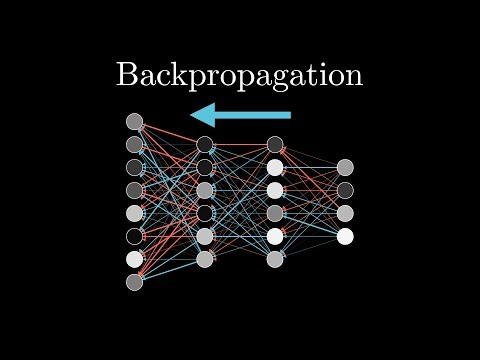

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ilg3gGewQ5U', width=853, height=480) # 3Blue1Brown 3

The fourth video is optional.

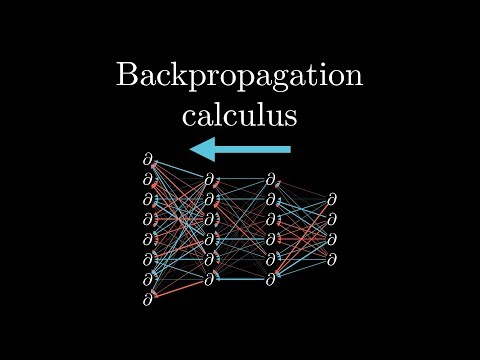

In [ ]:
YouTubeVideo('tIeHLnjs5U8', width=853, height=480) # 3Blue1Brown 4

---

## 2. Practice

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### For reproducible results

```python
tf.random.set_seed(42) # can be any number
```

### Experiments

- Experiment with only one layer, then with more (deeper net);
- Experiment with more or fewer hidden units – 32 units, 64 units etc.
  - One nice challenge is to see how good your results get with a bigger network, then see if you can get to the same level with a smaller one by training longer, or tweaking the learning rate/changing the optimizer;
  - Another is to see how good a result you can get with a fixed number of epochs (e.g. 5);
- Experiment with replacing `relu` with `tanh` activations;
- Try the [`Adam` optimizer](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers#classes_2): `optimizers.Adam(learning_rate=0.001)`
- Investigate the effect of different learning rates;
- Investigate the effect of a smaller (or bigger) batch size;
- Train for more epochs, or, conversely, set a number of epochs (say 5), and see how good you can get your model in just these 5 epochs;

**Think about how to record and organise your experiments in a neat way!**

In [2]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results


# load the IMDB dataset (max review length
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=10000)

# preprocess
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

# split training set into train & validation
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
x_val = x_train[:10000]
y_val = y_train[:10000]

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
# build
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

Sanity check, how does our network perform before training (use `.evaluate` on `partial_x_train, partial_y_train`). Is the accuracy a value you would expect?

In [ ]:
model.evaluate(partial_x_train, partial_y_train)

469/469 [==============================] - 6s 3ms/step - loss: 0.6947 - accuracy: 0.4990


[0.6946892142295837, 0.49900001287460327]

## Baseline accuracy is 0.4990 - Goal is to get a better result than this.

Now we can train.

In [ ]:
# save data from training into the 'history' object
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val),
)

Epoch 1/20
118/118 [==============================] - 10s 18ms/step - loss: 0.4126 - accuracy: 0.8362 - val_loss: 0.3022 - val_accuracy: 0.8802
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 0.2227 - accuracy: 0.9194 - val_loss: 0.2746 - val_accuracy: 0.8873
Epoch 3/20
118/118 [==============================] - 1s 8ms/step - loss: 0.1637 - accuracy: 0.9409 - val_loss: 0.2900 - val_accuracy: 0.8860
Epoch 4/20
118/118 [==============================] - 1s 9ms/step - loss: 0.1285 - accuracy: 0.9553 - val_loss: 0.3238 - val_accuracy: 0.8784
Epoch 5/20
118/118 [==============================] - 1s 11ms/step - loss: 0.1001 - accuracy: 0.9657 - val_loss: 0.3867 - val_accuracy: 0.8706
Epoch 6/20
118/118 [==============================] - 1s 9ms/step - loss: 0.0785 - accuracy: 0.9735 - val_loss: 0.4032 - val_accuracy: 0.8758
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0595 - accuracy: 0.9811 - val_loss: 0.4386 - val_accuracy: 0.8723
Epo

### Visualise your results

Thanks to these plots, it is easier to spot the epoch (epoch number) where our net reached peak performance (lowest *validation loss*/highest *validation accuracy*, prioritising accuracy if the two are not the same).

Think about what would be a good strategy to keep your code as organised as possible as you run many experiments?

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_dict["loss"]

[0.41263607144355774,
 0.2227342575788498,
 0.16371305286884308,
 0.128506138920784,
 0.10008280724287033,
 0.0785437673330307,
 0.05954210087656975,
 0.044591594487428665,
 0.03102974407374859,
 0.021766778081655502,
 0.01432269811630249,
 0.008173312060534954,
 0.004988359287381172,
 0.004251587670296431,
 0.00199040025472641,
 0.0010220683179795742,
 0.0004942903760820627,
 0.00040467886719852686,
 0.00013884769577998668,
 8.747341780690476e-05]

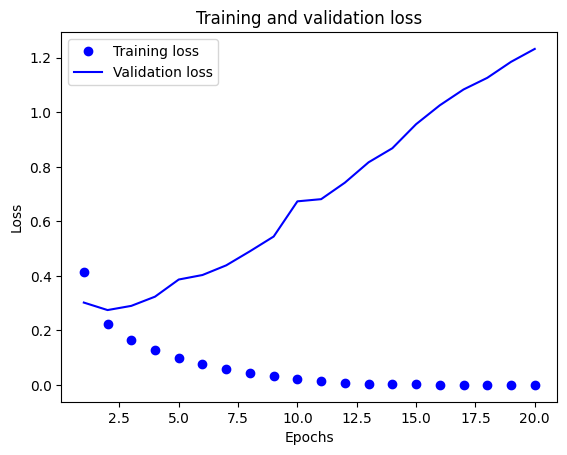

In [ ]:
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(loss) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, loss, blue_dots, label="Training loss")
plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
history_dict["accuracy"]

[0.8361999988555908,
 0.9193999767303467,
 0.940933346748352,
 0.9553333520889282,
 0.9657333493232727,
 0.9735333323478699,
 0.9810666441917419,
 0.9857333302497864,
 0.9911999702453613,
 0.9944666624069214,
 0.9962666630744934,
 0.9986000061035156,
 0.9991333484649658,
 0.9989333152770996,
 0.9997333288192749,
 0.9999333620071411,
 1.0,
 0.9999333620071411,
 1.0,
 1.0]

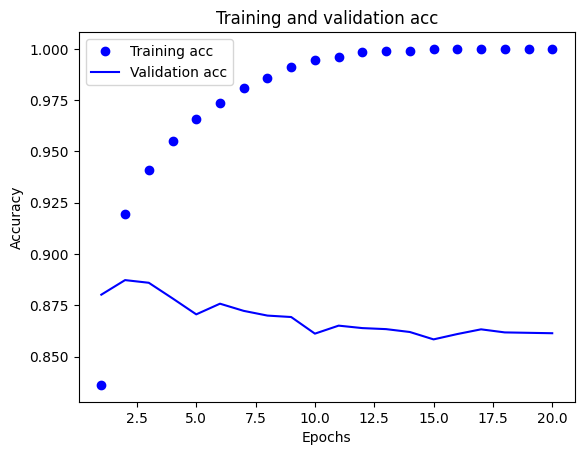

In [ ]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(acc) + 1)

blue_dots = "bo"
solid_blue_line = "b"

plt.plot(epochs, acc, blue_dots, label="Training acc")
plt.plot(epochs, val_acc, solid_blue_line, label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
print("The best validation accuracy at epoch", np.argmax(history_dict["val_accuracy"]) + 1)

The best validation accuracy at epoch 2


## Experiments

In [3]:
def plot_history(history):
    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]

    epochs = range(1, len(loss) + 1)

    blue_dots = "bo"
    solid_blue_line = "b"

    plt.plot(epochs, loss, blue_dots, label="Training loss")
    plt.plot(epochs, val_loss, solid_blue_line, label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]

    epochs = range(1, len(acc) + 1)

    blue_dots = "bo"
    solid_blue_line = "b"

    plt.plot(epochs, acc, blue_dots, label="Training acc")
    plt.plot(epochs, val_acc, solid_blue_line, label="Validation acc")
    plt.title("Training and validation acc")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.show()

In [ ]:
## Build function
def build_models():

    tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(16, activation="relu", input_shape=(10000,)))
    model.add(tf.keras.layers.Dense(16, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

    model.compile(
        optimizer="rmsprop",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

## Network 1

Training with epoch 20 and batch size: 12
Epoch 1/20
1250/1250 [==============================] - 9s 6ms/step - loss: 0.3397 - accuracy: 0.8579 - val_loss: 0.2975 - val_accuracy: 0.8800
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2149 - accuracy: 0.9192 - val_loss: 0.2797 - val_accuracy: 0.8888
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1754 - accuracy: 0.9347 - val_loss: 0.2907 - val_accuracy: 0.8863
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1515 - accuracy: 0.9467 - val_loss: 0.3128 - val_accuracy: 0.8836
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1299 - accuracy: 0.9547 - val_loss: 0.3400 - val_accuracy: 0.8835
Epoch 6/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1126 - accuracy: 0.9624 - val_loss: 0.3661 - val_accuracy: 0.8817
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.0970 - accuracy:

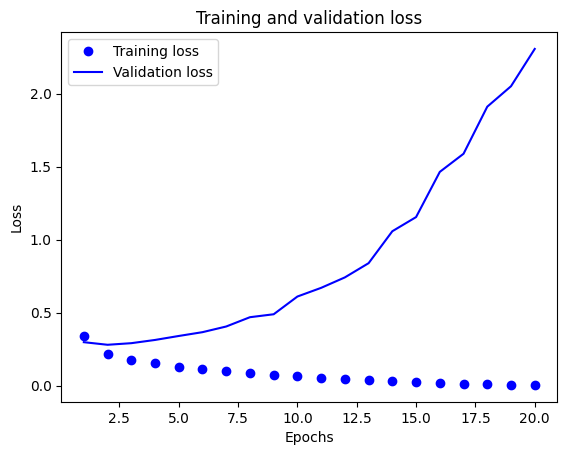

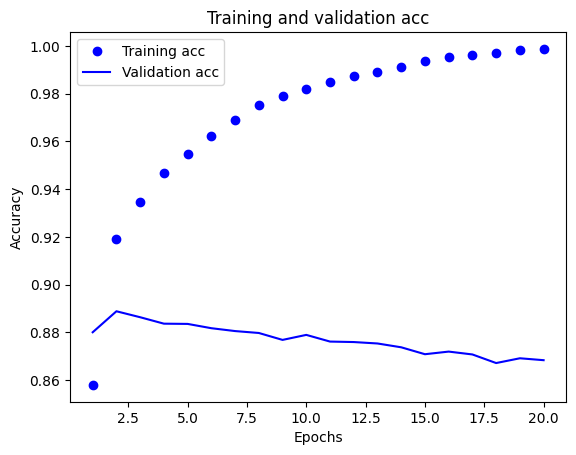


The max validation accuracy of 0.8888000249862671
At Epoch 2
The max validation loss of 2.3072903156280518
At Epoch 20

Training with epoch 20 and batch size: 64
Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3896 - accuracy: 0.8427 - val_loss: 0.2885 - val_accuracy: 0.8869
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.2091 - accuracy: 0.9225 - val_loss: 0.2972 - val_accuracy: 0.8830
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1567 - accuracy: 0.9444 - val_loss: 0.3051 - val_accuracy: 0.8861
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.1241 - accuracy: 0.9562 - val_loss: 0.3401 - val_accuracy: 0.8814
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0985 - accuracy: 0.9661 - val_loss: 0.3831 - val_accuracy: 0.8778
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0767 - accuracy: 0.9746 - val_loss: 0.4512 - val_a

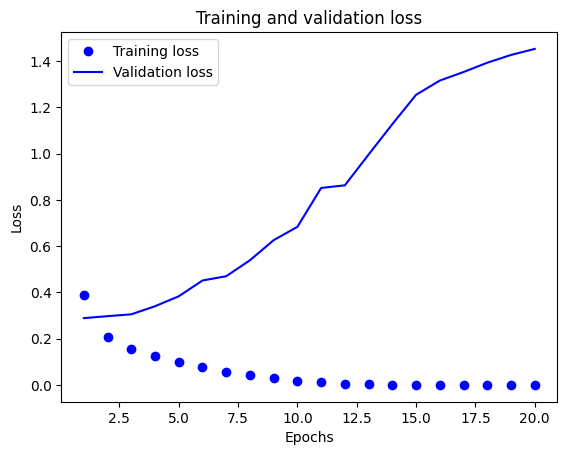

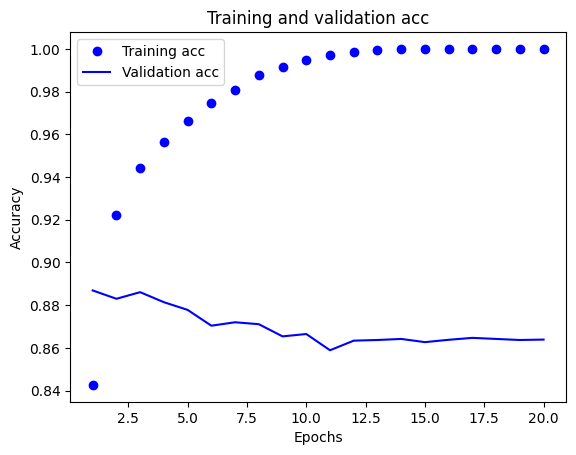


The max validation accuracy of 0.886900007724762
At Epoch 1
The max validation loss of 1.4520556926727295
At Epoch 20

Training with epoch 20 and batch size: 144
Epoch 1/20
105/105 [==============================] - 3s 19ms/step - loss: 0.4385 - accuracy: 0.8288 - val_loss: 0.3147 - val_accuracy: 0.8778
Epoch 2/20
105/105 [==============================] - 1s 9ms/step - loss: 0.2376 - accuracy: 0.9135 - val_loss: 0.2767 - val_accuracy: 0.8889
Epoch 3/20
105/105 [==============================] - 1s 9ms/step - loss: 0.1742 - accuracy: 0.9393 - val_loss: 0.2984 - val_accuracy: 0.8839
Epoch 4/20
105/105 [==============================] - 1s 9ms/step - loss: 0.1352 - accuracy: 0.9537 - val_loss: 0.3012 - val_accuracy: 0.8863
Epoch 5/20
105/105 [==============================] - 1s 9ms/step - loss: 0.1070 - accuracy: 0.9647 - val_loss: 0.3280 - val_accuracy: 0.8828
Epoch 6/20
105/105 [==============================] - 1s 9ms/step - loss: 0.0840 - accuracy: 0.9747 - val_loss: 0.3700 - val_a

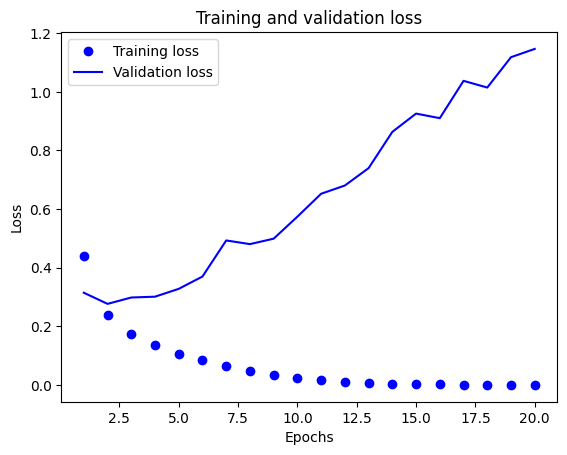

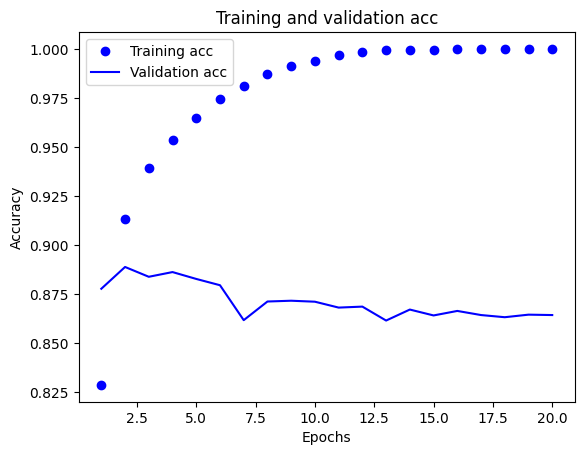


The max validation accuracy of 0.8888999819755554
At Epoch 2
The max validation loss of 1.1465375423431396
At Epoch 20

Training with epoch 20 and batch size: 336
Epoch 1/20
45/45 [==============================] - 3s 50ms/step - loss: 0.5002 - accuracy: 0.8144 - val_loss: 0.3813 - val_accuracy: 0.8665
Epoch 2/20
45/45 [==============================] - 1s 17ms/step - loss: 0.2991 - accuracy: 0.8995 - val_loss: 0.3153 - val_accuracy: 0.8745
Epoch 3/20
45/45 [==============================] - 1s 17ms/step - loss: 0.2226 - accuracy: 0.9227 - val_loss: 0.2765 - val_accuracy: 0.8890
Epoch 4/20
45/45 [==============================] - 1s 18ms/step - loss: 0.1764 - accuracy: 0.9388 - val_loss: 0.2751 - val_accuracy: 0.8890
Epoch 5/20
45/45 [==============================] - 1s 18ms/step - loss: 0.1472 - accuracy: 0.9510 - val_loss: 0.2882 - val_accuracy: 0.8850
Epoch 6/20
45/45 [==============================] - 1s 18ms/step - loss: 0.1211 - accuracy: 0.9623 - val_loss: 0.3050 - val_accurac

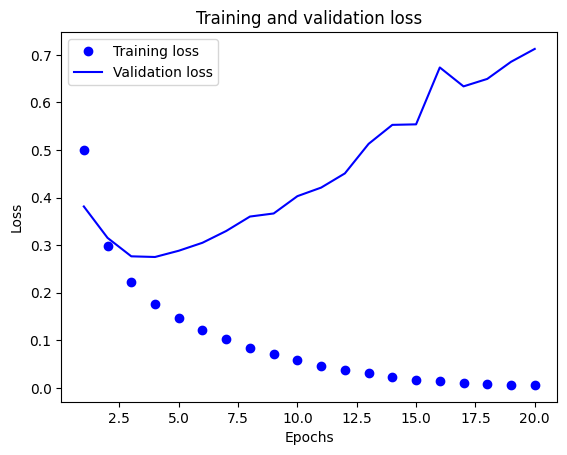

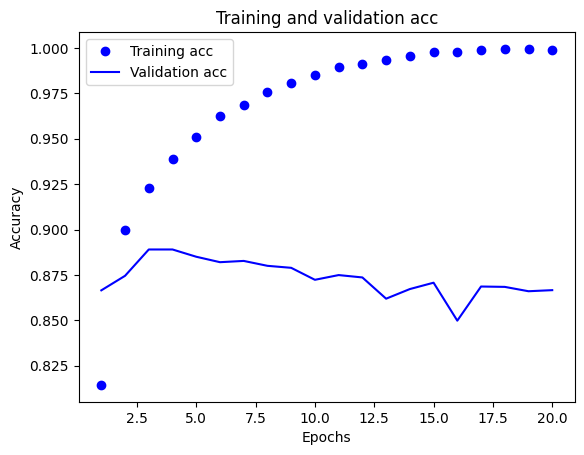


The max validation accuracy of 0.8889999985694885
At Epoch 3
The max validation loss of 0.7124691605567932
At Epoch 20

Training with epoch 20 and batch size: 960
Epoch 1/20
16/16 [==============================] - 3s 166ms/step - loss: 0.6135 - accuracy: 0.6984 - val_loss: 0.5236 - val_accuracy: 0.8398
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 0.4478 - accuracy: 0.8553 - val_loss: 0.4136 - val_accuracy: 0.8439
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 0.3447 - accuracy: 0.8973 - val_loss: 0.3598 - val_accuracy: 0.8755
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.2789 - accuracy: 0.9160 - val_loss: 0.3241 - val_accuracy: 0.8742
Epoch 5/20
16/16 [==============================] - 1s 48ms/step - loss: 0.2318 - accuracy: 0.9313 - val_loss: 0.3196 - val_accuracy: 0.8764
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.2025 - accuracy: 0.9380 - val_loss: 0.2839 - val_accura

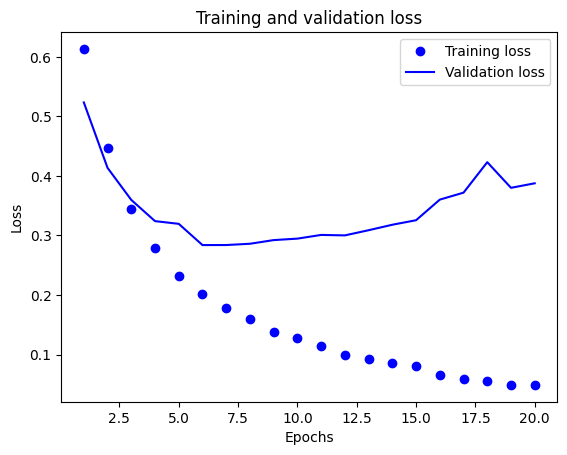

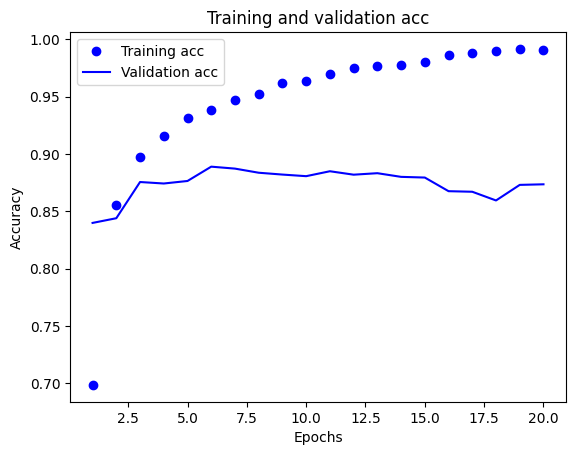


The max validation accuracy of 0.8888999819755554
At Epoch 6
The max validation loss of 0.5235697031021118
At Epoch 1

Training with epoch 20 and batch size: 1728
Epoch 1/20
9/9 [==============================] - 3s 235ms/step - loss: 0.6351 - accuracy: 0.6645 - val_loss: 0.5713 - val_accuracy: 0.7708
Epoch 2/20
9/9 [==============================] - 1s 81ms/step - loss: 0.5076 - accuracy: 0.8202 - val_loss: 0.4647 - val_accuracy: 0.8386
Epoch 3/20
9/9 [==============================] - 1s 85ms/step - loss: 0.4190 - accuracy: 0.8745 - val_loss: 0.4273 - val_accuracy: 0.8316
Epoch 4/20
9/9 [==============================] - 1s 88ms/step - loss: 0.3550 - accuracy: 0.8974 - val_loss: 0.3718 - val_accuracy: 0.8772
Epoch 5/20
9/9 [==============================] - 1s 140ms/step - loss: 0.3172 - accuracy: 0.9059 - val_loss: 0.3381 - val_accuracy: 0.8794
Epoch 6/20
9/9 [==============================] - 1s 132ms/step - loss: 0.2722 - accuracy: 0.9223 - val_loss: 0.3412 - val_accuracy: 0.8640

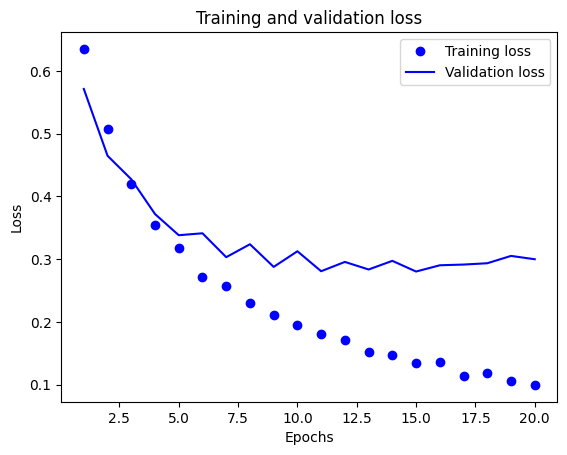

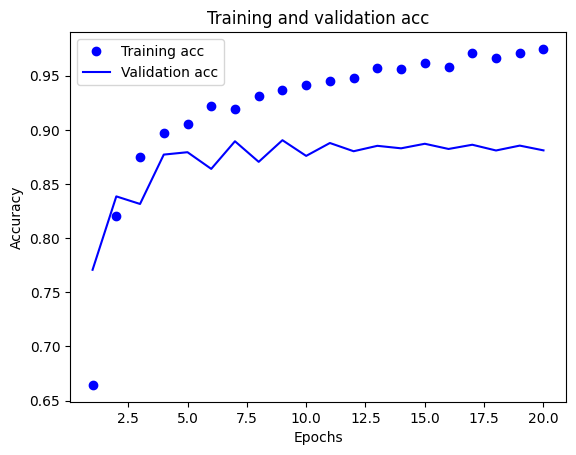


The max validation accuracy of 0.890500009059906
At Epoch 9
The max validation loss of 0.5712642669677734
At Epoch 1



In [ ]:
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 20 and batch size:", batch_size)

    # build
    model = build_models()

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=20,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 1 Conclusion Results:
In this first Experiment I used epoch 20 and a list of bach sizes 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 1728 (6th loop)produced the best accuracy validation of 0890500009059906 at Epoch 9 and worst validation loss of was produced by bach 12 (1st loop) at epoch 20 of 2.3072903156280518

## Network 2

Training with epoch 20 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 14s 7ms/step - loss: 0.3469 - accuracy: 0.8550 - val_loss: 0.2781 - val_accuracy: 0.8900
Epoch 2/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2148 - accuracy: 0.9187 - val_loss: 0.3073 - val_accuracy: 0.8841
Epoch 3/8
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1786 - accuracy: 0.9336 - val_loss: 0.3203 - val_accuracy: 0.8798
Epoch 4/8
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1553 - accuracy: 0.9436 - val_loss: 0.3138 - val_accuracy: 0.8859
Epoch 5/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1381 - accuracy: 0.9531 - val_loss: 0.3396 - val_accuracy: 0.8855
Epoch 6/8
1250/1250 [==============================] - 7s 5ms/step - loss: 0.1225 - accuracy: 0.9586 - val_loss: 0.3588 - val_accuracy: 0.8812
Epoch 7/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1101 - accuracy: 0.964

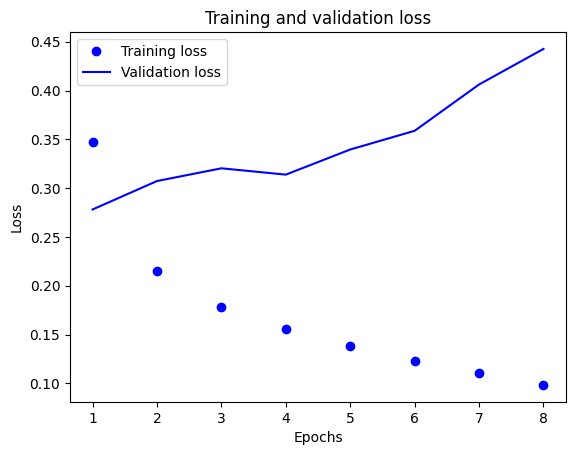

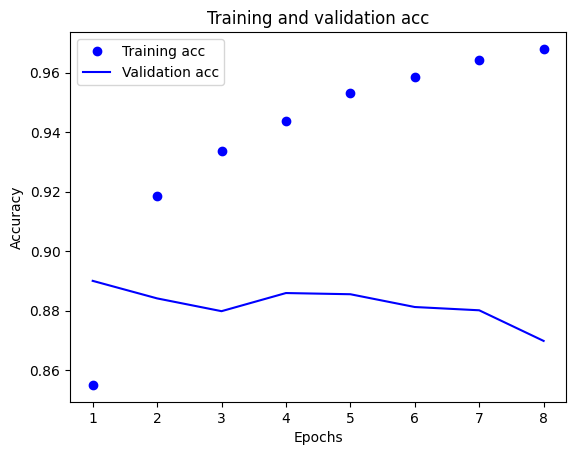


The max validation accuracy of 0.8899999856948853
At Epoch 1
The max validation loss of 0.4426564574241638
At Epoch 8

Training with epoch 20 and batch size: 64
Epoch 1/8
235/235 [==============================] - 4s 13ms/step - loss: 0.3829 - accuracy: 0.8453 - val_loss: 0.2901 - val_accuracy: 0.8838
Epoch 2/8
235/235 [==============================] - 2s 8ms/step - loss: 0.2097 - accuracy: 0.9204 - val_loss: 0.2773 - val_accuracy: 0.8887
Epoch 3/8
235/235 [==============================] - 2s 8ms/step - loss: 0.1583 - accuracy: 0.9425 - val_loss: 0.3079 - val_accuracy: 0.8833
Epoch 4/8
235/235 [==============================] - 2s 9ms/step - loss: 0.1251 - accuracy: 0.9546 - val_loss: 0.3309 - val_accuracy: 0.8826
Epoch 5/8
235/235 [==============================] - 2s 8ms/step - loss: 0.0986 - accuracy: 0.9649 - val_loss: 0.3827 - val_accuracy: 0.8770
Epoch 6/8
235/235 [==============================] - 2s 7ms/step - loss: 0.0787 - accuracy: 0.9733 - val_loss: 0.4178 - val_accuracy

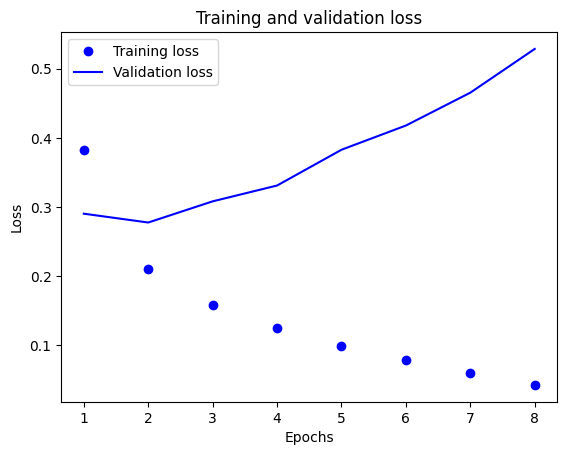

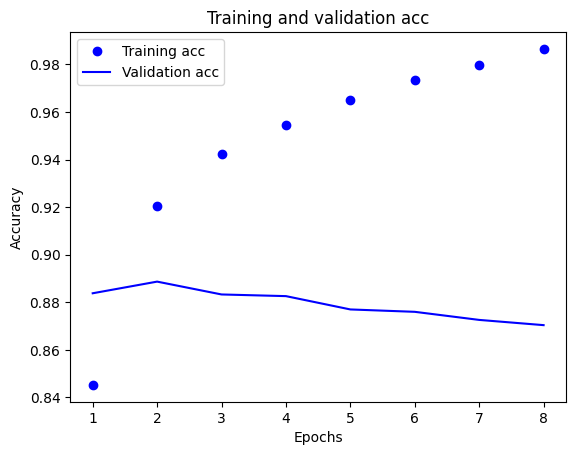


The max validation accuracy of 0.888700008392334
At Epoch 2
The max validation loss of 0.5287699103355408
At Epoch 8

Training with epoch 20 and batch size: 144
Epoch 1/8
105/105 [==============================] - 3s 21ms/step - loss: 0.4098 - accuracy: 0.8348 - val_loss: 0.2945 - val_accuracy: 0.8877
Epoch 2/8
105/105 [==============================] - 1s 13ms/step - loss: 0.2233 - accuracy: 0.9181 - val_loss: 0.2743 - val_accuracy: 0.8891
Epoch 3/8
105/105 [==============================] - 1s 13ms/step - loss: 0.1605 - accuracy: 0.9431 - val_loss: 0.2933 - val_accuracy: 0.8840
Epoch 4/8
105/105 [==============================] - 1s 10ms/step - loss: 0.1243 - accuracy: 0.9555 - val_loss: 0.3223 - val_accuracy: 0.8806
Epoch 5/8
105/105 [==============================] - 1s 10ms/step - loss: 0.0951 - accuracy: 0.9679 - val_loss: 0.3635 - val_accuracy: 0.8792
Epoch 6/8
105/105 [==============================] - 1s 13ms/step - loss: 0.0741 - accuracy: 0.9745 - val_loss: 0.3970 - val_acc

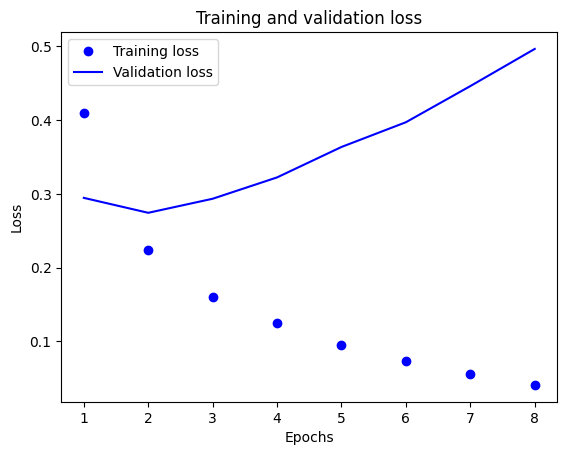

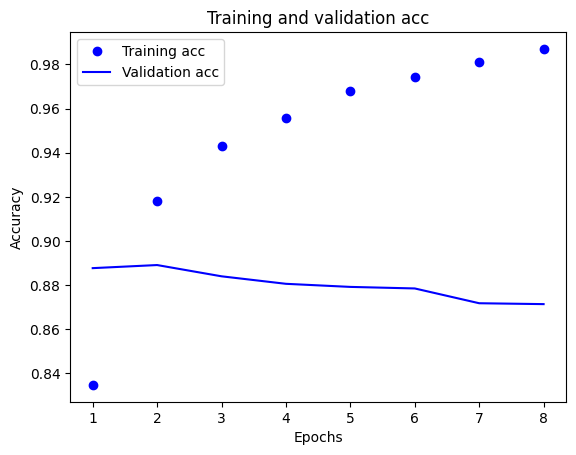


The max validation accuracy of 0.8891000151634216
At Epoch 2
The max validation loss of 0.49639129638671875
At Epoch 8

Training with epoch 20 and batch size: 336
Epoch 1/8
45/45 [==============================] - 3s 44ms/step - loss: 0.5129 - accuracy: 0.7926 - val_loss: 0.3930 - val_accuracy: 0.8548
Epoch 2/8
45/45 [==============================] - 1s 19ms/step - loss: 0.3007 - accuracy: 0.9003 - val_loss: 0.2967 - val_accuracy: 0.8878
Epoch 3/8
45/45 [==============================] - 1s 19ms/step - loss: 0.2213 - accuracy: 0.9251 - val_loss: 0.2749 - val_accuracy: 0.8934
Epoch 4/8
45/45 [==============================] - 1s 18ms/step - loss: 0.1759 - accuracy: 0.9405 - val_loss: 0.2747 - val_accuracy: 0.8890
Epoch 5/8
45/45 [==============================] - 1s 18ms/step - loss: 0.1458 - accuracy: 0.9507 - val_loss: 0.3018 - val_accuracy: 0.8842
Epoch 6/8
45/45 [==============================] - 1s 17ms/step - loss: 0.1209 - accuracy: 0.9616 - val_loss: 0.3197 - val_accuracy: 0.8

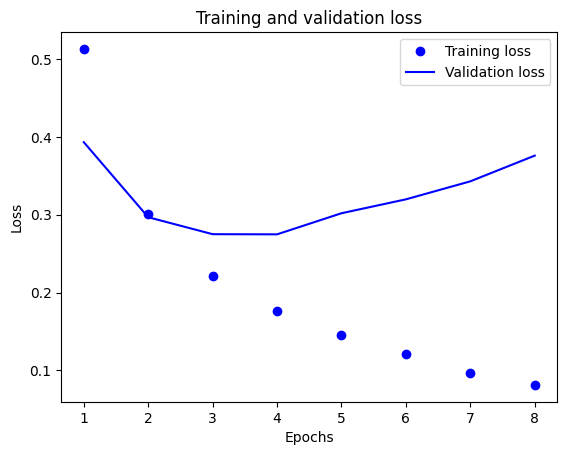

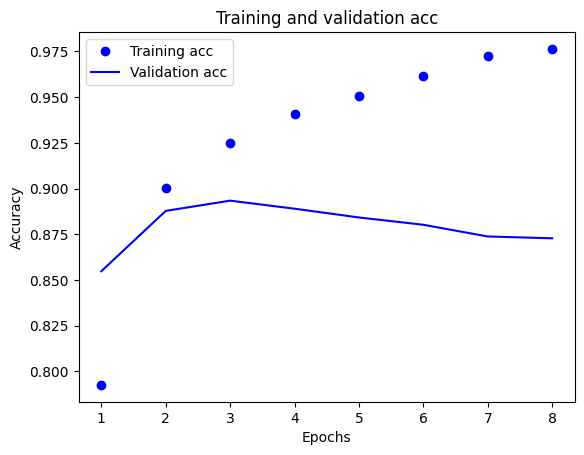


The max validation accuracy of 0.8934000134468079
At Epoch 3
The max validation loss of 0.3930228054523468
At Epoch 1

Training with epoch 20 and batch size: 960
Epoch 1/8
16/16 [==============================] - 3s 124ms/step - loss: 0.5669 - accuracy: 0.7192 - val_loss: 0.4426 - val_accuracy: 0.8423
Epoch 2/8
16/16 [==============================] - 1s 51ms/step - loss: 0.3690 - accuracy: 0.8806 - val_loss: 0.3753 - val_accuracy: 0.8512
Epoch 3/8
16/16 [==============================] - 1s 47ms/step - loss: 0.2924 - accuracy: 0.9065 - val_loss: 0.3191 - val_accuracy: 0.8799
Epoch 4/8
16/16 [==============================] - 1s 47ms/step - loss: 0.2424 - accuracy: 0.9239 - val_loss: 0.2908 - val_accuracy: 0.8897
Epoch 5/8
16/16 [==============================] - 1s 46ms/step - loss: 0.2099 - accuracy: 0.9323 - val_loss: 0.2807 - val_accuracy: 0.8899
Epoch 6/8
16/16 [==============================] - 1s 47ms/step - loss: 0.1885 - accuracy: 0.9381 - val_loss: 0.3200 - val_accuracy: 0.8

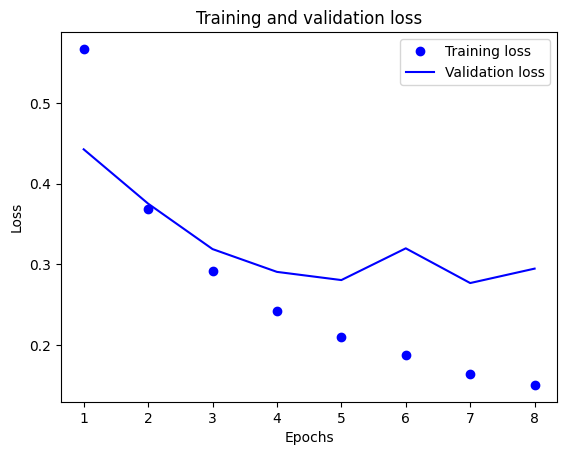

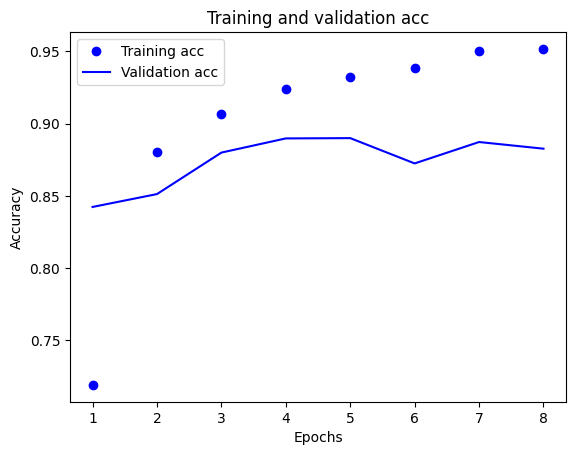


The max validation accuracy of 0.8899000287055969
At Epoch 5
The max validation loss of 0.4425744116306305
At Epoch 1

Training with epoch 20 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 3s 239ms/step - loss: 0.6445 - accuracy: 0.6363 - val_loss: 0.5347 - val_accuracy: 0.8324
Epoch 2/8
9/9 [==============================] - 1s 119ms/step - loss: 0.4891 - accuracy: 0.8379 - val_loss: 0.4560 - val_accuracy: 0.8290
Epoch 3/8
9/9 [==============================] - 1s 85ms/step - loss: 0.4026 - accuracy: 0.8753 - val_loss: 0.3974 - val_accuracy: 0.8658
Epoch 4/8
9/9 [==============================] - 1s 84ms/step - loss: 0.3453 - accuracy: 0.8927 - val_loss: 0.3586 - val_accuracy: 0.8703
Epoch 5/8
9/9 [==============================] - 1s 85ms/step - loss: 0.2950 - accuracy: 0.9121 - val_loss: 0.3295 - val_accuracy: 0.8808
Epoch 6/8
9/9 [==============================] - 1s 117ms/step - loss: 0.2718 - accuracy: 0.9133 - val_loss: 0.3134 - val_accuracy: 0.8879
Epoch

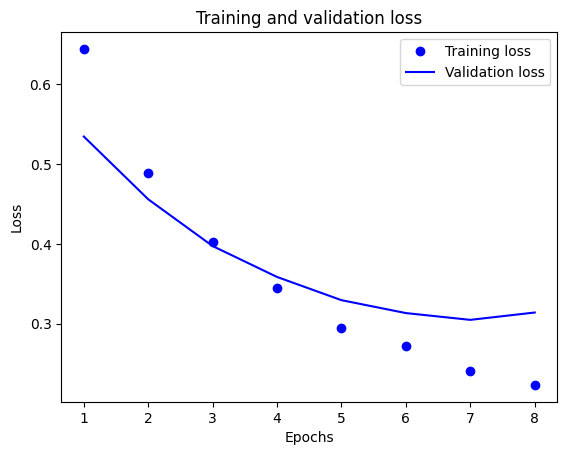

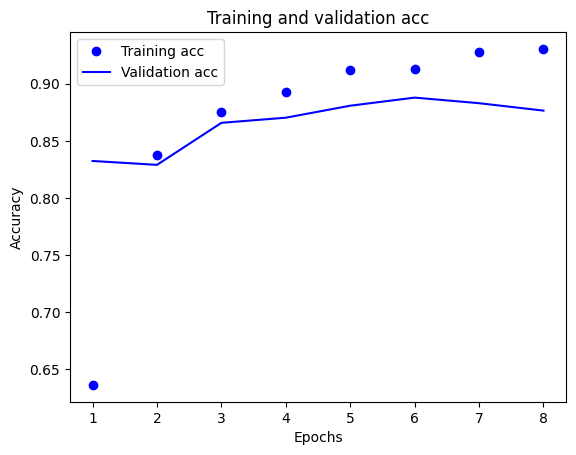


The max validation accuracy of 0.8878999948501587
At Epoch 6
The max validation loss of 0.5346906185150146
At Epoch 1



In [ ]:
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8 and batch size:", batch_size)

    # build
    model = build_models()

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 2 Conclusion Results:
In this second Experiment I used epoch 8 and a list of bach sizes 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of `960 (4th loop)produced the best accuracy validation of  0.8934000134468079 at Epoch 3` and worst validation loss of was produced by bach 1272 (6th loop) at epoch 1 of 0.5346906185150146

## Network 3

Training with epoch 70 and batch size: 12
Epoch 1/70
1250/1250 [==============================] - 12s 5ms/step - loss: 0.3418 - accuracy: 0.8568 - val_loss: 0.2812 - val_accuracy: 0.8864
Epoch 2/70
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2165 - accuracy: 0.9171 - val_loss: 0.2939 - val_accuracy: 0.8848
Epoch 3/70
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1780 - accuracy: 0.9347 - val_loss: 0.3127 - val_accuracy: 0.8855
Epoch 4/70
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1546 - accuracy: 0.9449 - val_loss: 0.3173 - val_accuracy: 0.8859
Epoch 5/70
1250/1250 [==============================] - 5s 4ms/step - loss: 0.1322 - accuracy: 0.9534 - val_loss: 0.3507 - val_accuracy: 0.8823
Epoch 6/70
1250/1250 [==============================] - 6s 5ms/step - loss: 0.1133 - accuracy: 0.9608 - val_loss: 0.3838 - val_accuracy: 0.8826
Epoch 7/70
1250/1250 [==============================] - 6s 5ms/step - loss: 0.0984 - accuracy

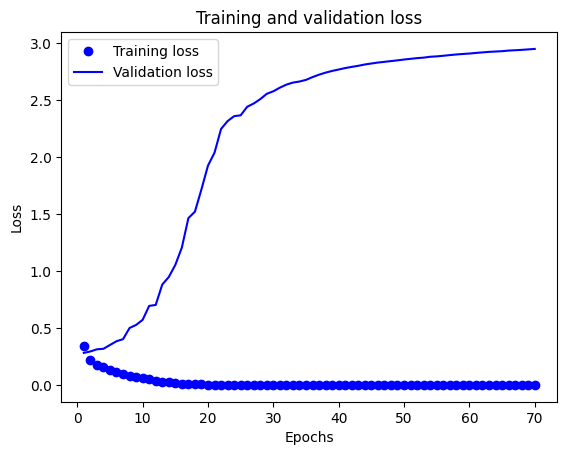

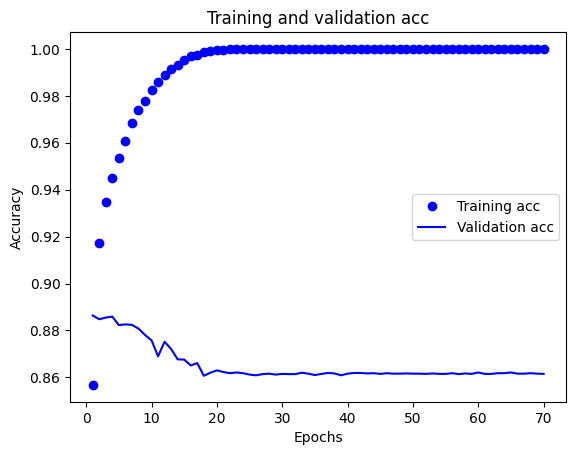


The max validation accuracy of 0.8863999843597412
At Epoch 1
The max validation loss of 2.950875759124756
At Epoch 70

Training with epoch 70 and batch size: 64
Epoch 1/70
235/235 [==============================] - 3s 11ms/step - loss: 0.3614 - accuracy: 0.8493 - val_loss: 0.2761 - val_accuracy: 0.8893
Epoch 2/70
235/235 [==============================] - 2s 7ms/step - loss: 0.1991 - accuracy: 0.9230 - val_loss: 0.2974 - val_accuracy: 0.8834
Epoch 3/70
235/235 [==============================] - 2s 8ms/step - loss: 0.1467 - accuracy: 0.9465 - val_loss: 0.3236 - val_accuracy: 0.8816
Epoch 4/70
235/235 [==============================] - 1s 6ms/step - loss: 0.1102 - accuracy: 0.9619 - val_loss: 0.3942 - val_accuracy: 0.8762
Epoch 5/70
235/235 [==============================] - 2s 7ms/step - loss: 0.0851 - accuracy: 0.9705 - val_loss: 0.4185 - val_accuracy: 0.8722
Epoch 6/70
235/235 [==============================] - 1s 6ms/step - loss: 0.0609 - accuracy: 0.9800 - val_loss: 0.4936 - val_ac

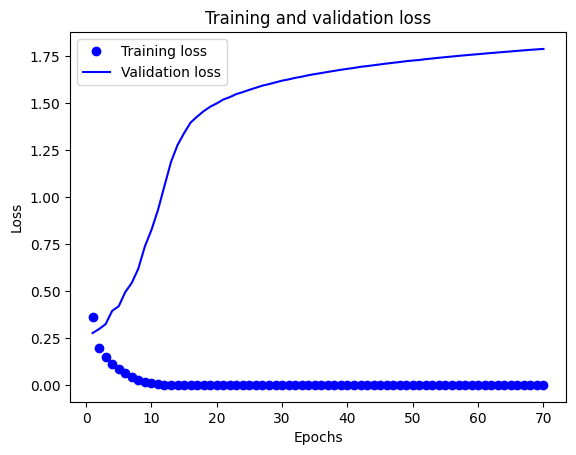

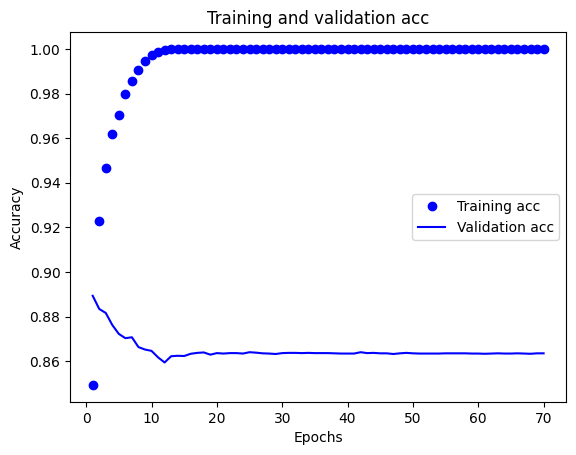


The max validation accuracy of 0.8892999887466431
At Epoch 1
The max validation loss of 1.7877329587936401
At Epoch 70

Training with epoch 70 and batch size: 144
Epoch 1/70
105/105 [==============================] - 3s 19ms/step - loss: 0.4258 - accuracy: 0.8319 - val_loss: 0.2977 - val_accuracy: 0.8841
Epoch 2/70
105/105 [==============================] - 1s 9ms/step - loss: 0.2256 - accuracy: 0.9175 - val_loss: 0.2992 - val_accuracy: 0.8778
Epoch 3/70
105/105 [==============================] - 1s 8ms/step - loss: 0.1646 - accuracy: 0.9419 - val_loss: 0.2965 - val_accuracy: 0.8832
Epoch 4/70
105/105 [==============================] - 1s 9ms/step - loss: 0.1272 - accuracy: 0.9561 - val_loss: 0.3357 - val_accuracy: 0.8771
Epoch 5/70
105/105 [==============================] - 1s 13ms/step - loss: 0.0975 - accuracy: 0.9661 - val_loss: 0.3976 - val_accuracy: 0.8691
Epoch 6/70
105/105 [==============================] - 1s 14ms/step - loss: 0.0748 - accuracy: 0.9760 - val_loss: 0.4239 - va

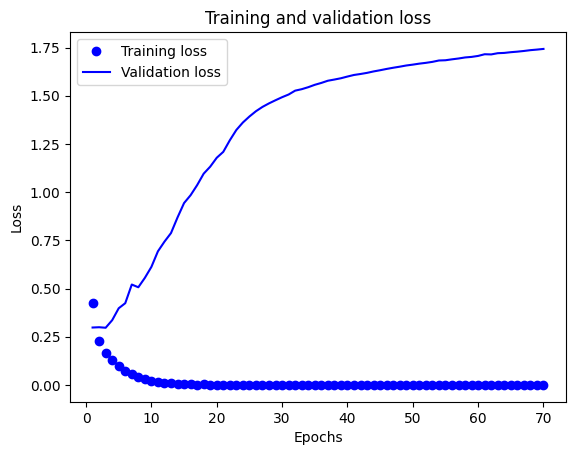

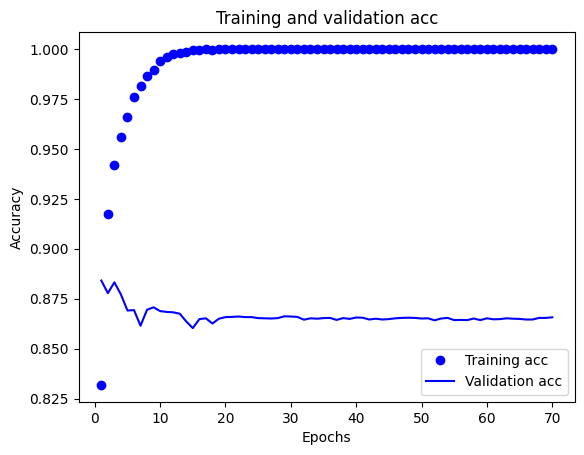


The max validation accuracy of 0.8841000199317932
At Epoch 1
The max validation loss of 1.7426353693008423
At Epoch 70

Training with epoch 70 and batch size: 336
Epoch 1/70
45/45 [==============================] - 3s 50ms/step - loss: 0.5005 - accuracy: 0.7982 - val_loss: 0.3707 - val_accuracy: 0.8697
Epoch 2/70
45/45 [==============================] - 1s 17ms/step - loss: 0.2893 - accuracy: 0.9019 - val_loss: 0.2925 - val_accuracy: 0.8867
Epoch 3/70
45/45 [==============================] - 1s 17ms/step - loss: 0.2148 - accuracy: 0.9261 - val_loss: 0.2781 - val_accuracy: 0.8875
Epoch 4/70
45/45 [==============================] - 1s 19ms/step - loss: 0.1721 - accuracy: 0.9393 - val_loss: 0.2900 - val_accuracy: 0.8849
Epoch 5/70
45/45 [==============================] - 1s 17ms/step - loss: 0.1414 - accuracy: 0.9541 - val_loss: 0.2887 - val_accuracy: 0.8849
Epoch 6/70
45/45 [==============================] - 1s 30ms/step - loss: 0.1148 - accuracy: 0.9641 - val_loss: 0.3058 - val_accurac

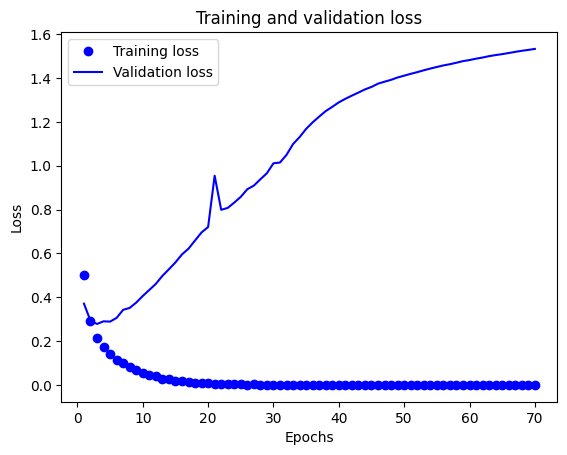

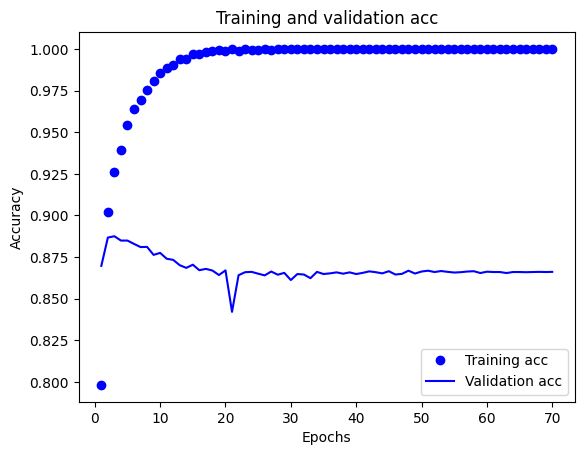


The max validation accuracy of 0.887499988079071
At Epoch 3
The max validation loss of 1.532312035560608
At Epoch 70

Training with epoch 70 and batch size: 960
Epoch 1/70
16/16 [==============================] - 3s 124ms/step - loss: 0.6198 - accuracy: 0.6937 - val_loss: 0.5206 - val_accuracy: 0.8409
Epoch 2/70
16/16 [==============================] - 1s 48ms/step - loss: 0.4518 - accuracy: 0.8619 - val_loss: 0.4126 - val_accuracy: 0.8702
Epoch 3/70
16/16 [==============================] - 1s 43ms/step - loss: 0.3572 - accuracy: 0.8908 - val_loss: 0.3541 - val_accuracy: 0.8749
Epoch 4/70
16/16 [==============================] - 1s 48ms/step - loss: 0.2934 - accuracy: 0.9082 - val_loss: 0.3158 - val_accuracy: 0.8862
Epoch 5/70
16/16 [==============================] - 1s 44ms/step - loss: 0.2495 - accuracy: 0.9197 - val_loss: 0.2955 - val_accuracy: 0.8899
Epoch 6/70
16/16 [==============================] - 1s 44ms/step - loss: 0.2181 - accuracy: 0.9286 - val_loss: 0.2881 - val_accuracy

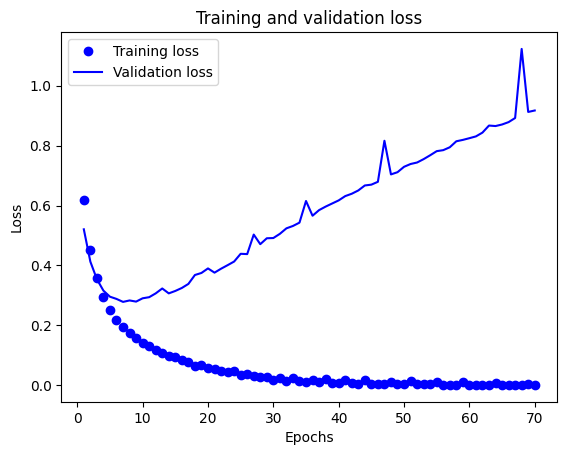

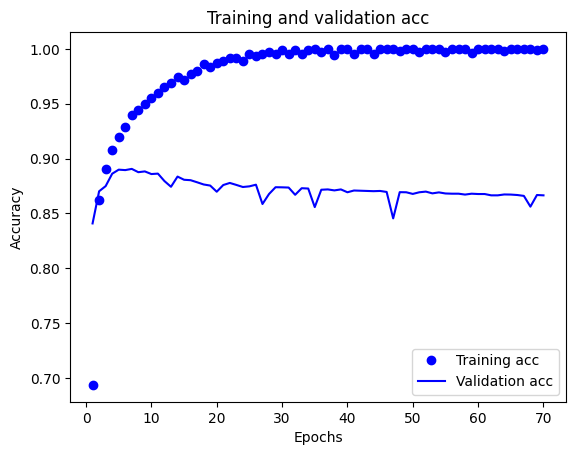


The max validation accuracy of 0.8906000256538391
At Epoch 7
The max validation loss of 1.123106598854065
At Epoch 68

Training with epoch 70 and batch size: 1728
Epoch 1/70
9/9 [==============================] - 3s 242ms/step - loss: 0.6509 - accuracy: 0.6325 - val_loss: 0.5766 - val_accuracy: 0.8128
Epoch 2/70
9/9 [==============================] - 1s 79ms/step - loss: 0.5300 - accuracy: 0.8311 - val_loss: 0.5025 - val_accuracy: 0.8098
Epoch 3/70
9/9 [==============================] - 1s 120ms/step - loss: 0.4462 - accuracy: 0.8715 - val_loss: 0.4434 - val_accuracy: 0.8441
Epoch 4/70
9/9 [==============================] - 1s 86ms/step - loss: 0.3913 - accuracy: 0.8843 - val_loss: 0.3896 - val_accuracy: 0.8694
Epoch 5/70
9/9 [==============================] - 1s 79ms/step - loss: 0.3440 - accuracy: 0.8982 - val_loss: 0.3647 - val_accuracy: 0.8712
Epoch 6/70
9/9 [==============================] - 1s 125ms/step - loss: 0.3107 - accuracy: 0.9045 - val_loss: 0.3359 - val_accuracy: 0.8788

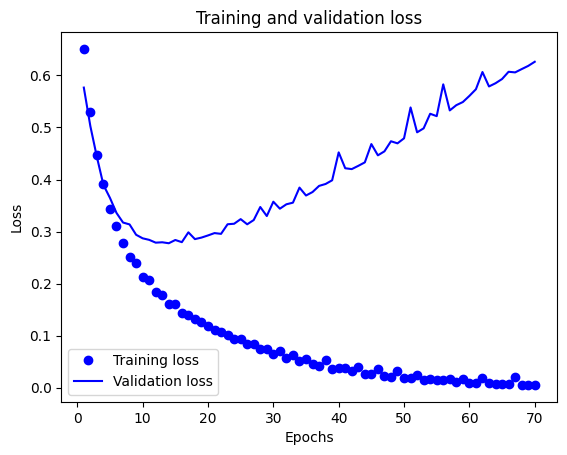

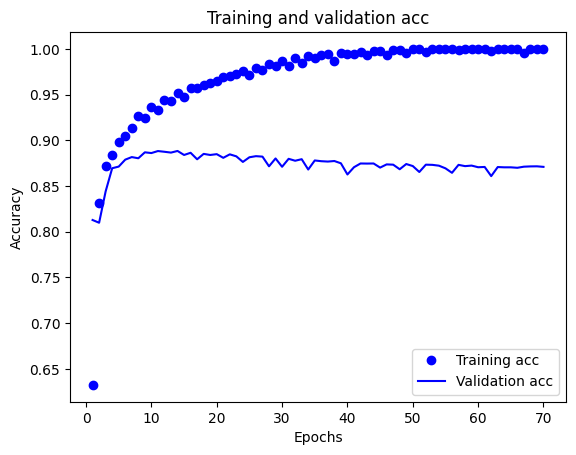


The max validation accuracy of 0.8883000016212463
At Epoch 14
The max validation loss of 0.6262239813804626
At Epoch 70



In [ ]:
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 70 and batch size:", batch_size)

    # build
    model = build_models()

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=70,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 3 Conclusion Results:
In the third experiment I used epoch 70 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 960 (5th loop) produced the best validation accuracy of 0.8906000256538391 at Epoch 7 and the worst validation loss was produced by batch 12 with a result of 2.950875759124756
At Epoch 70

## Network 4 With Regularisation

In [4]:
## Build with regularisation
def build_model_reg(layer_1_units, layer_2_units, layer_3_units, reg=True,clear=True):
  if clear:
      tf.keras.backend.clear_session()
  model = tf.keras.models.Sequential()
  #Regularisation(only if reg is true)
  model.add(
      tf.keras.layers.Dense(
          layer_1_units,
          kernel_regularizer=tf.keras.regularizers.l2(0.002) if reg else None,
          activation='relu', input_shape=(10000,)
      )
  )

  model.add(
      tf.keras.layers.Dense(
          layer_2_units,
          kernel_regularizer=tf.keras.regularizers.l2(0.001) if reg else None,
          activation='relu'
      )
  )

  model.add(tf.keras.layers.Dense(layer_3_units, activation='sigmoid'))
  model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model

Training with epoch 8,regularizers - layer 1 (16 units) = 0.002 and regularizers layer 2 (16 units) = 0.001 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 14s 6ms/step - loss: 0.3943 - accuracy: 0.8522 - val_loss: 0.3562 - val_accuracy: 0.8720
Epoch 2/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3314 - accuracy: 0.8821 - val_loss: 0.3537 - val_accuracy: 0.8719
Epoch 3/8
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3225 - accuracy: 0.8865 - val_loss: 0.3431 - val_accuracy: 0.8755
Epoch 4/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3143 - accuracy: 0.8907 - val_loss: 0.3386 - val_accuracy: 0.8777
Epoch 5/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3063 - accuracy: 0.8917 - val_loss: 0.3364 - val_accuracy: 0.8758
Epoch 6/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.3005 - accuracy: 0.8922 - val_loss: 0.3375 - val_accuracy: 0.8725
Epoch 7/8
1250

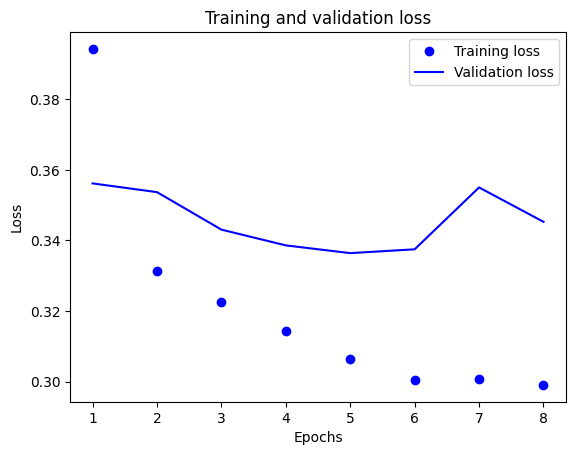

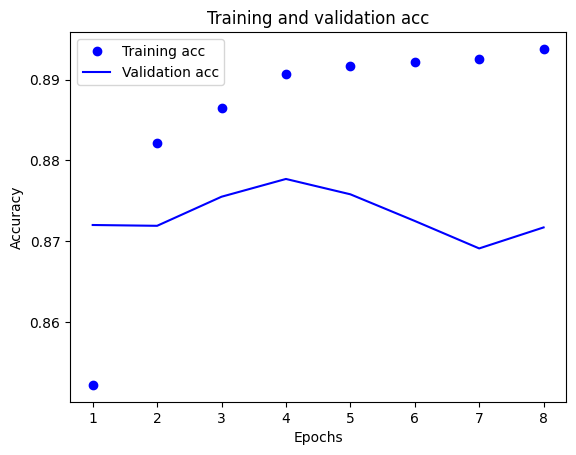


The max validation accuracy of 0.8776999711990356
At Epoch 4
The max validation loss of 0.35618066787719727
At Epoch 1

Training with epoch 8,regularizers - layer 1 (16 units) = 0.002 and regularizers layer 2 (16 units) = 0.001 and batch size: 64
Epoch 1/8
235/235 [==============================] - 4s 12ms/step - loss: 0.4289 - accuracy: 0.8498 - val_loss: 0.3425 - val_accuracy: 0.8809
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 0.2956 - accuracy: 0.9061 - val_loss: 0.3785 - val_accuracy: 0.8652
Epoch 3/8
235/235 [==============================] - 2s 8ms/step - loss: 0.2705 - accuracy: 0.9151 - val_loss: 0.3447 - val_accuracy: 0.8825
Epoch 4/8
235/235 [==============================] - 2s 7ms/step - loss: 0.2614 - accuracy: 0.9192 - val_loss: 0.3573 - val_accuracy: 0.8777
Epoch 5/8
235/235 [==============================] - 1s 6ms/step - loss: 0.2526 - accuracy: 0.9241 - val_loss: 0.3561 - val_accuracy: 0.8800
Epoch 6/8
235/235 [===========================

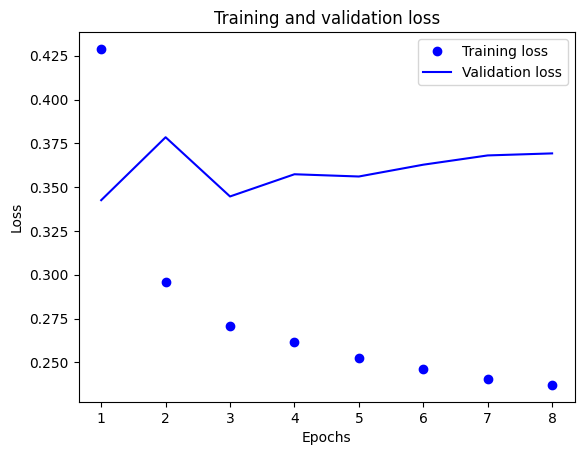

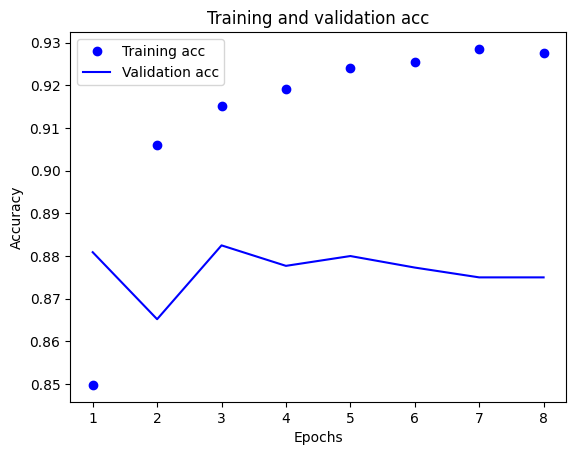


The max validation accuracy of 0.8824999928474426
At Epoch 3
The max validation loss of 0.37847113609313965
At Epoch 2

Training with epoch 8,regularizers - layer 1 (16 units) = 0.002 and regularizers layer 2 (16 units) = 0.001 and batch size: 144
Epoch 1/8
105/105 [==============================] - 3s 26ms/step - loss: 0.4664 - accuracy: 0.8381 - val_loss: 0.3565 - val_accuracy: 0.8854
Epoch 2/8
105/105 [==============================] - 1s 10ms/step - loss: 0.2975 - accuracy: 0.9135 - val_loss: 0.4404 - val_accuracy: 0.8406
Epoch 3/8
105/105 [==============================] - 1s 9ms/step - loss: 0.2665 - accuracy: 0.9229 - val_loss: 0.4121 - val_accuracy: 0.8591
Epoch 4/8
105/105 [==============================] - 1s 9ms/step - loss: 0.2454 - accuracy: 0.9328 - val_loss: 0.4586 - val_accuracy: 0.8476
Epoch 5/8
105/105 [==============================] - 1s 9ms/step - loss: 0.2355 - accuracy: 0.9375 - val_loss: 0.3967 - val_accuracy: 0.8678
Epoch 6/8
105/105 [=========================

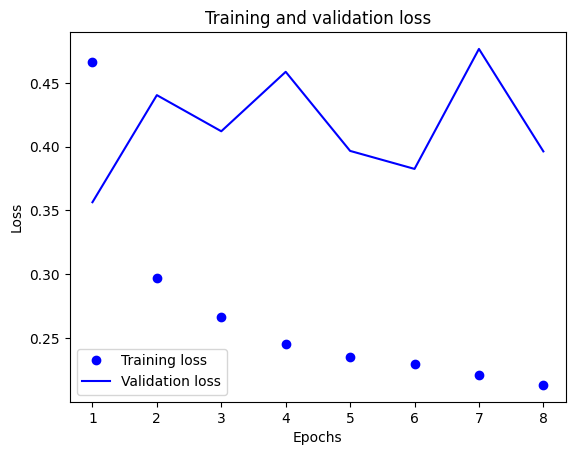

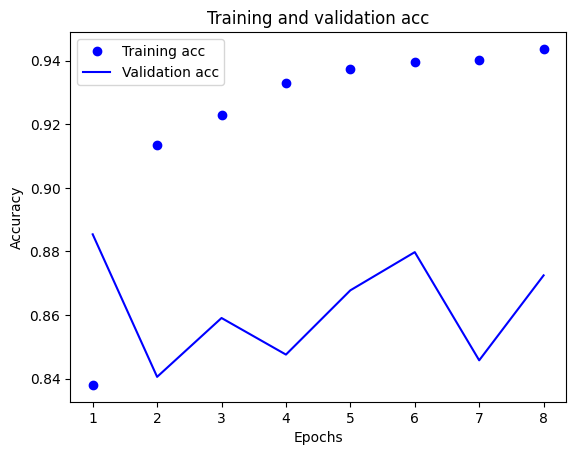


The max validation accuracy of 0.8853999972343445
At Epoch 1
The max validation loss of 0.47656020522117615
At Epoch 7

Training with epoch 8,regularizers - layer 1 (16 units) = 0.002 and regularizers layer 2 (16 units) = 0.001 and batch size: 336
Epoch 1/8
45/45 [==============================] - 3s 56ms/step - loss: 0.5896 - accuracy: 0.7996 - val_loss: 0.4917 - val_accuracy: 0.8262
Epoch 2/8
45/45 [==============================] - 1s 21ms/step - loss: 0.3913 - accuracy: 0.8899 - val_loss: 0.3758 - val_accuracy: 0.8828
Epoch 3/8
45/45 [==============================] - 1s 21ms/step - loss: 0.3201 - accuracy: 0.9098 - val_loss: 0.3552 - val_accuracy: 0.8869
Epoch 4/8
45/45 [==============================] - 1s 18ms/step - loss: 0.2846 - accuracy: 0.9239 - val_loss: 0.3462 - val_accuracy: 0.8866
Epoch 5/8
45/45 [==============================] - 1s 18ms/step - loss: 0.2629 - accuracy: 0.9315 - val_loss: 0.3479 - val_accuracy: 0.8851
Epoch 6/8
45/45 [==============================] - 

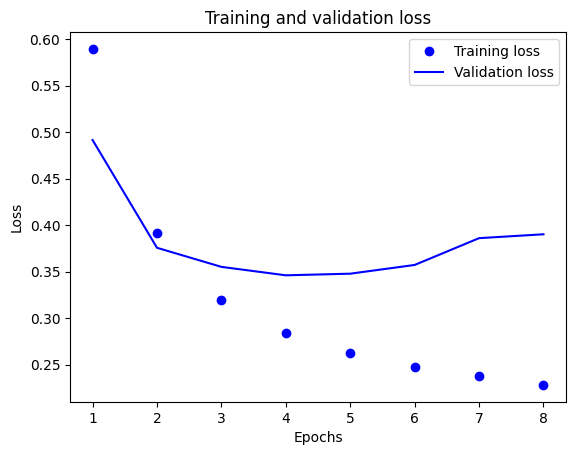

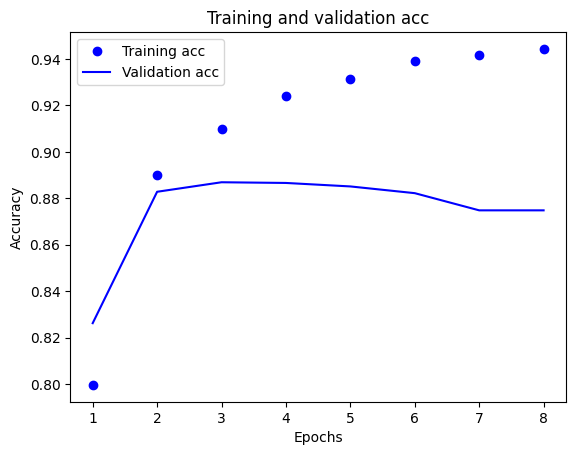


The max validation accuracy of 0.886900007724762
At Epoch 3
The max validation loss of 0.4916563332080841
At Epoch 1

Training with epoch 8,regularizers - layer 1 (16 units) = 0.002 and regularizers layer 2 (16 units) = 0.001 and batch size: 960
Epoch 1/8
16/16 [==============================] - 3s 125ms/step - loss: 0.6637 - accuracy: 0.7057 - val_loss: 0.5385 - val_accuracy: 0.8313
Epoch 2/8
16/16 [==============================] - 1s 45ms/step - loss: 0.4666 - accuracy: 0.8635 - val_loss: 0.4643 - val_accuracy: 0.8392
Epoch 3/8
16/16 [==============================] - 1s 71ms/step - loss: 0.3834 - accuracy: 0.8941 - val_loss: 0.3872 - val_accuracy: 0.8853
Epoch 4/8
16/16 [==============================] - 1s 78ms/step - loss: 0.3311 - accuracy: 0.9124 - val_loss: 0.3706 - val_accuracy: 0.8824
Epoch 5/8
16/16 [==============================] - 1s 81ms/step - loss: 0.3024 - accuracy: 0.9203 - val_loss: 0.3534 - val_accuracy: 0.8884
Epoch 6/8
16/16 [==============================] - 1

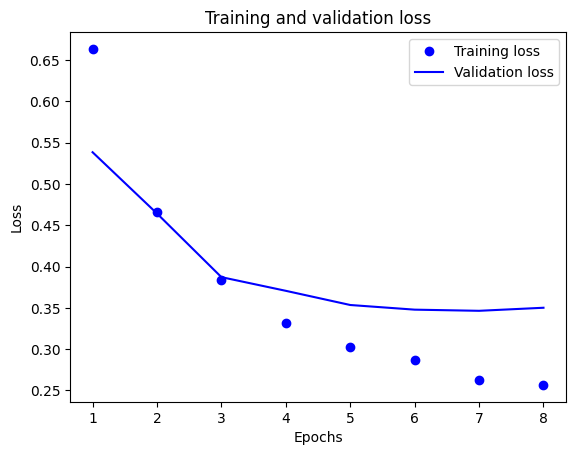

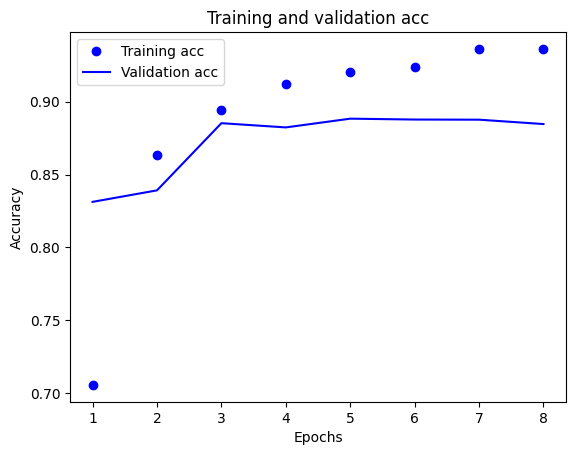


The max validation accuracy of 0.8884000182151794
At Epoch 5
The max validation loss of 0.5385222434997559
At Epoch 1

Training with epoch 8,regularizers - layer 1 (16 units) = 0.002 and regularizers layer 2 (16 units) = 0.001 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 3s 231ms/step - loss: 0.7286 - accuracy: 0.6391 - val_loss: 0.6644 - val_accuracy: 0.7676
Epoch 2/8
9/9 [==============================] - 1s 83ms/step - loss: 0.5946 - accuracy: 0.8255 - val_loss: 0.5822 - val_accuracy: 0.8042
Epoch 3/8
9/9 [==============================] - 1s 80ms/step - loss: 0.5103 - accuracy: 0.8655 - val_loss: 0.4916 - val_accuracy: 0.8577
Epoch 4/8
9/9 [==============================] - 1s 85ms/step - loss: 0.4500 - accuracy: 0.8859 - val_loss: 0.4589 - val_accuracy: 0.8679
Epoch 5/8
9/9 [==============================] - 1s 85ms/step - loss: 0.4076 - accuracy: 0.8972 - val_loss: 0.4249 - val_accuracy: 0.8770
Epoch 6/8
9/9 [==============================] - 1s 121ms/st

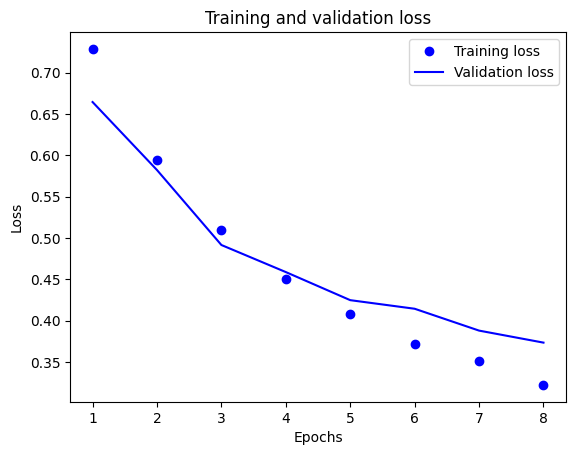

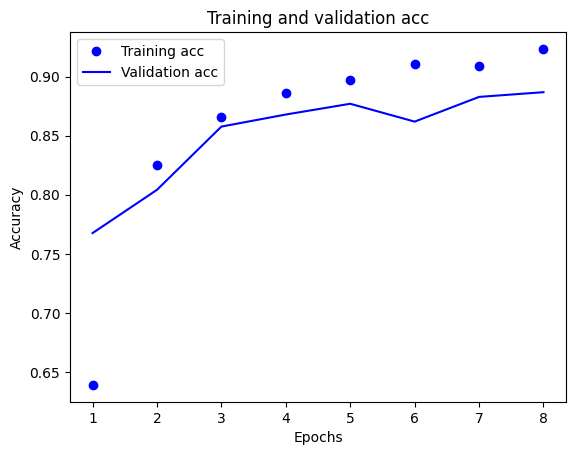


The max validation accuracy of 0.8867999911308289
At Epoch 8
The max validation loss of 0.6643850803375244
At Epoch 1



In [5]:
# I used the same epoch 7 of network 2 as it gave me the best result out of the 3 networks without regularisation.
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8, regularizers layer 1 (16 units) = 0.002 , regularizers layer 2 (16 units) = 0.001 and batch size:", batch_size)

    # build
    model = build_model_reg(16,16,1,True,True)

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 4 Results:

In experiment 4 I used Regularization 0.002 in layer 1 and 0.001 in layer 2 and epoch 8 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 960 (5th loop) produced the best validation accuracy of 0.8884000182151794 at Epoch 5 and the worst validation loss was produced by batch 1728 with a result of  0.6643850803375244 At Epoch 1

## Network 5 With Regularisation

In [4]:
## Build with regularisation
def build_model_reg(layer_1_units, layer_2_units, layer_3_units, reg=True,clear=True):
  if clear:
      tf.keras.backend.clear_session()
  model = tf.keras.models.Sequential()
  #Regularisation(only if reg is true)
  model.add(
      tf.keras.layers.Dense(
          layer_1_units,
          kernel_regularizer=tf.keras.regularizers.l2(0.002) if reg else None,
          activation='relu', input_shape=(10000,)
      )
  )

  model.add(
      tf.keras.layers.Dense(
          layer_2_units,
          kernel_regularizer=tf.keras.regularizers.l2(0.001) if reg else None,
          activation='relu'
      )
  )

  model.add(tf.keras.layers.Dense(layer_3_units, activation='sigmoid'))
  model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
  )
  return model

Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 13s 6ms/step - loss: 0.4038 - accuracy: 0.8492 - val_loss: 0.3607 - val_accuracy: 0.8643
Epoch 2/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3269 - accuracy: 0.8865 - val_loss: 0.3453 - val_accuracy: 0.8738
Epoch 3/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3214 - accuracy: 0.8878 - val_loss: 0.3401 - val_accuracy: 0.8750
Epoch 4/8
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3123 - accuracy: 0.8865 - val_loss: 0.3407 - val_accuracy: 0.8763
Epoch 5/8
1250/1250 [==============================] - 7s 5ms/step - loss: 0.3088 - accuracy: 0.8903 - val_loss: 0.3382 - val_accuracy: 0.8764
Epoch 6/8
1250/1250 [==============================] - 5s 4ms/step - loss: 0.3013 - accuracy: 0.8939 - val_loss: 0.3332 - val_accuracy: 0.8789
Epoch 7/8
1250/125

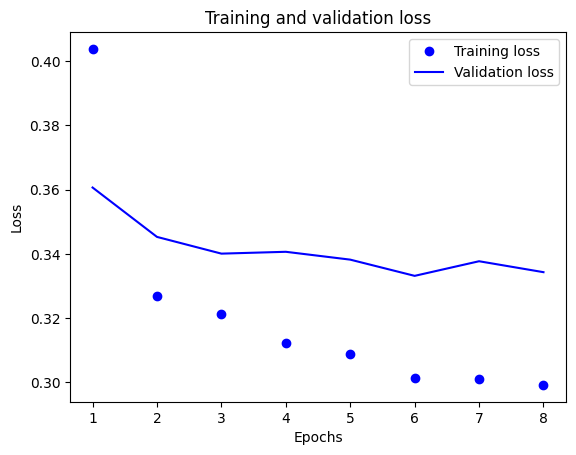

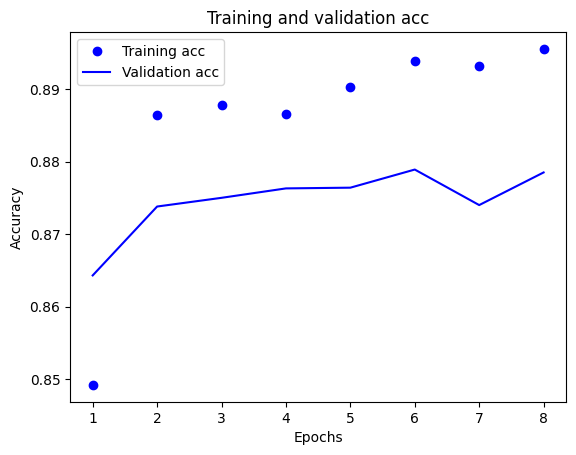


The max validation accuracy of 0.8788999915122986
At Epoch 6
The max validation loss of 0.36068785190582275
At Epoch 1

Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size: 64
Epoch 1/8
235/235 [==============================] - 4s 12ms/step - loss: 0.4531 - accuracy: 0.8440 - val_loss: 0.3505 - val_accuracy: 0.8819
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 0.3054 - accuracy: 0.9041 - val_loss: 0.3336 - val_accuracy: 0.8842
Epoch 3/8
235/235 [==============================] - 1s 6ms/step - loss: 0.2793 - accuracy: 0.9137 - val_loss: 0.3728 - val_accuracy: 0.8684
Epoch 4/8
235/235 [==============================] - 1s 6ms/step - loss: 0.2670 - accuracy: 0.9194 - val_loss: 0.3447 - val_accuracy: 0.8795
Epoch 5/8
235/235 [==============================] - 1s 6ms/step - loss: 0.2579 - accuracy: 0.9230 - val_loss: 0.3717 - val_accuracy: 0.8692
Epoch 6/8
235/235 [==============================]

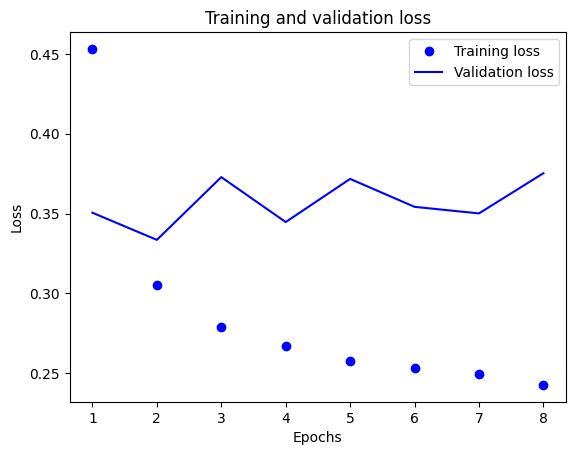

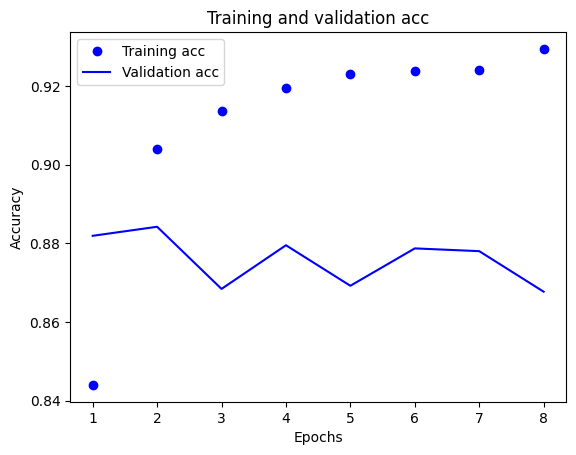


The max validation accuracy of 0.8841999769210815
At Epoch 2
The max validation loss of 0.3752647042274475
At Epoch 8

Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size: 144
Epoch 1/8
105/105 [==============================] - 3s 26ms/step - loss: 0.4684 - accuracy: 0.8319 - val_loss: 0.4120 - val_accuracy: 0.8389
Epoch 2/8
105/105 [==============================] - 1s 11ms/step - loss: 0.2983 - accuracy: 0.9103 - val_loss: 0.3285 - val_accuracy: 0.8898
Epoch 3/8
105/105 [==============================] - 1s 12ms/step - loss: 0.2606 - accuracy: 0.9238 - val_loss: 0.3378 - val_accuracy: 0.8848
Epoch 4/8
105/105 [==============================] - 1s 14ms/step - loss: 0.2405 - accuracy: 0.9321 - val_loss: 0.3474 - val_accuracy: 0.8843
Epoch 5/8
105/105 [==============================] - 1s 8ms/step - loss: 0.2277 - accuracy: 0.9391 - val_loss: 0.4034 - val_accuracy: 0.8650
Epoch 6/8
105/105 [============================

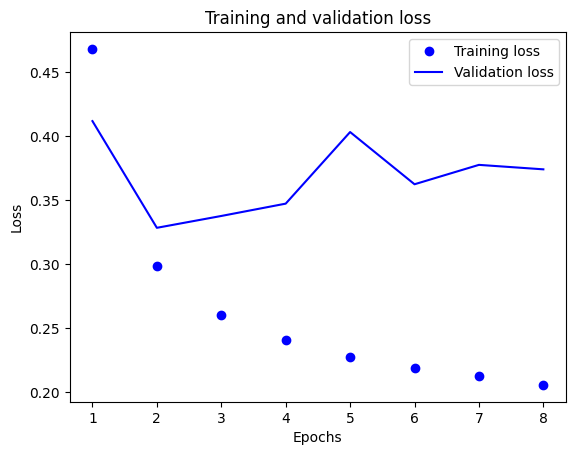

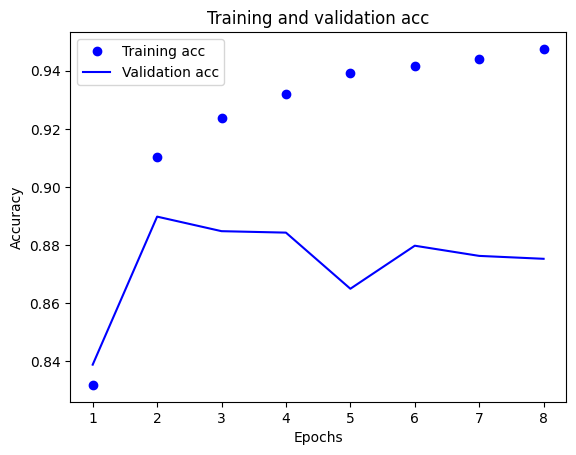


The max validation accuracy of 0.8898000121116638
At Epoch 2
The max validation loss of 0.41196146607398987
At Epoch 1

Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size: 336
Epoch 1/8
45/45 [==============================] - 4s 64ms/step - loss: 0.5439 - accuracy: 0.8085 - val_loss: 0.4276 - val_accuracy: 0.8672
Epoch 2/8
45/45 [==============================] - 1s 31ms/step - loss: 0.3648 - accuracy: 0.8937 - val_loss: 0.3608 - val_accuracy: 0.8810
Epoch 3/8
45/45 [==============================] - 1s 27ms/step - loss: 0.3035 - accuracy: 0.9136 - val_loss: 0.3439 - val_accuracy: 0.8842
Epoch 4/8
45/45 [==============================] - 1s 20ms/step - loss: 0.2735 - accuracy: 0.9250 - val_loss: 0.3363 - val_accuracy: 0.8867
Epoch 5/8
45/45 [==============================] - 1s 17ms/step - loss: 0.2570 - accuracy: 0.9326 - val_loss: 0.3412 - val_accuracy: 0.8854
Epoch 6/8
45/45 [==============================] - 1s 1

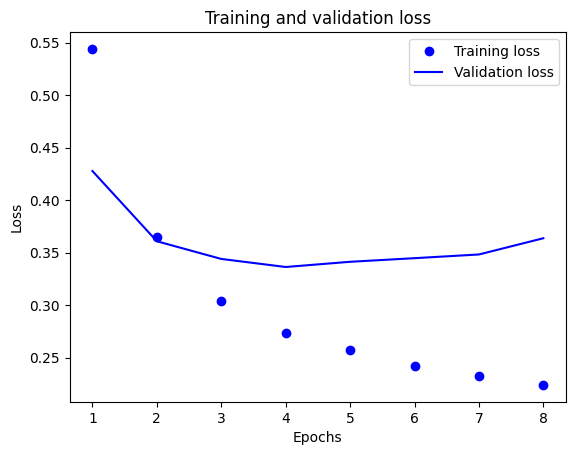

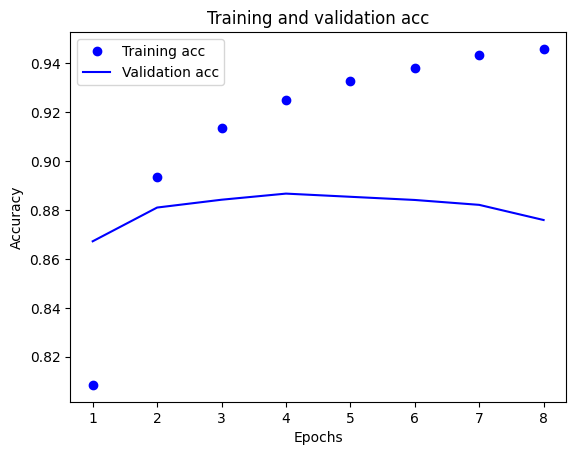


The max validation accuracy of 0.8866999745368958
At Epoch 4
The max validation loss of 0.4276425838470459
At Epoch 1

Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size: 960
Epoch 1/8
16/16 [==============================] - 3s 125ms/step - loss: 0.6618 - accuracy: 0.6878 - val_loss: 0.5597 - val_accuracy: 0.8402
Epoch 2/8
16/16 [==============================] - 1s 48ms/step - loss: 0.4993 - accuracy: 0.8625 - val_loss: 0.4657 - val_accuracy: 0.8629
Epoch 3/8
16/16 [==============================] - 1s 47ms/step - loss: 0.4147 - accuracy: 0.8904 - val_loss: 0.4192 - val_accuracy: 0.8746
Epoch 4/8
16/16 [==============================] - 1s 55ms/step - loss: 0.3602 - accuracy: 0.9091 - val_loss: 0.3864 - val_accuracy: 0.8828
Epoch 5/8
16/16 [==============================] - 1s 72ms/step - loss: 0.3264 - accuracy: 0.9160 - val_loss: 0.3684 - val_accuracy: 0.8776
Epoch 6/8
16/16 [==============================] - 1s 7

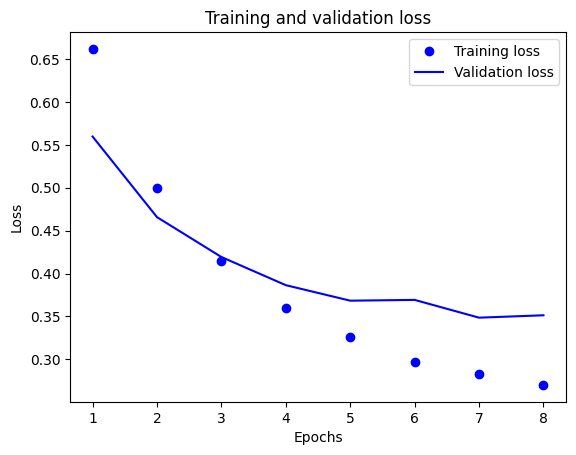

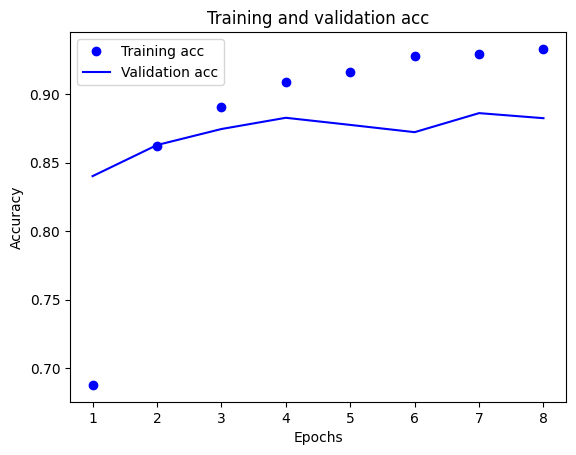


The max validation accuracy of 0.8862000107765198
At Epoch 7
The max validation loss of 0.5596588850021362
At Epoch 1

Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 3s 230ms/step - loss: 0.7073 - accuracy: 0.5377 - val_loss: 0.6703 - val_accuracy: 0.6095
Epoch 2/8
9/9 [==============================] - 1s 79ms/step - loss: 0.6371 - accuracy: 0.6170 - val_loss: 0.6304 - val_accuracy: 0.6125
Epoch 3/8
9/9 [==============================] - 1s 80ms/step - loss: 0.5997 - accuracy: 0.7031 - val_loss: 0.5928 - val_accuracy: 0.7522
Epoch 4/8
9/9 [==============================] - 1s 79ms/step - loss: 0.5637 - accuracy: 0.7854 - val_loss: 0.5846 - val_accuracy: 0.7138
Epoch 5/8
9/9 [==============================] - 1s 85ms/step - loss: 0.5443 - accuracy: 0.8137 - val_loss: 0.5576 - val_accuracy: 0.8237
Epoch 6/8
9/9 [==============================] - 1s 83ms/step - 

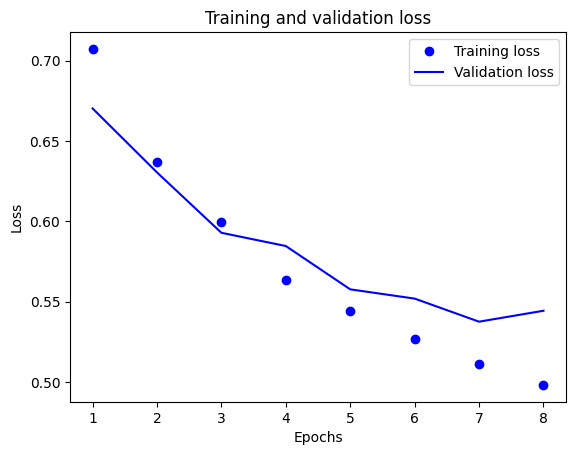

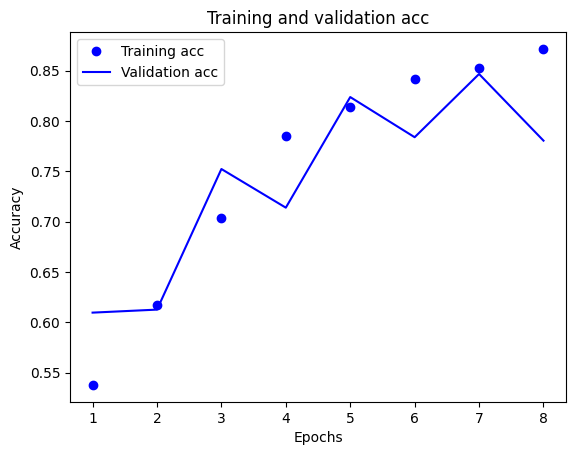


The max validation accuracy of 0.8465999960899353
At Epoch 7
The max validation loss of 0.6702649593353271
At Epoch 1



In [5]:
# I used the same epoch 7 of network 2 as it gave me the best result out of the 3 networks without regularisation.
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8, regularizers layer 1 (10 units) = 0.002 , regularizers layer 2 (5 units) = 0.001 and batch size:", batch_size)

    # build
    model = build_model_reg(10,5,1,True,True)

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 5 Results:

In experiment 5 I used Regularization 0.002 in layer 1 (10 units) and 0.001 in layer 2 (5 units) and epoch 8 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 144 (3th loop) produced the best validation accuracy of 0.8898000121116638 at Epoch 2 and the worst validation loss was produced by batch 1728 with a result of 0.6702649593353271 At Epoch 1

## NETWORK 6 With Low Dropout




In [4]:
# Build function with Low drop
def build_model_drop(layer1_units, layer2_units,layer3_units, drop, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(layer1_units, activation='relu', input_shape=(10000,)))
    if drop:
      model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Dense(layer2_units, activation='relu'))
    if drop:
      model.add(tf.keras.layers.Dropout(0.25))

    model.add(tf.keras.layers.Dense(layer3_units, activation='sigmoid'))
    model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
    )
    return model

Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 15s 7ms/step - loss: 0.4347 - accuracy: 0.8084 - val_loss: 0.3093 - val_accuracy: 0.8782
Epoch 2/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3065 - accuracy: 0.8905 - val_loss: 0.3059 - val_accuracy: 0.8857
Epoch 3/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2694 - accuracy: 0.9064 - val_loss: 0.3016 - val_accuracy: 0.8820
Epoch 4/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2386 - accuracy: 0.9182 - val_loss: 0.2995 - val_accuracy: 0.8868
Epoch 5/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.2201 - accuracy: 0.9251 - val_loss: 0.3135 - val_accuracy: 0.8835
Epoch 6/8
1250/1250 [==============================] - 7s 5ms/step - loss: 0.2138 - accuracy: 0.9306 - val_loss: 0.3155 - val_accuracy: 0.8837
Epoch 7/8
1250/1250 [==============================] - 7s 6ms/ste

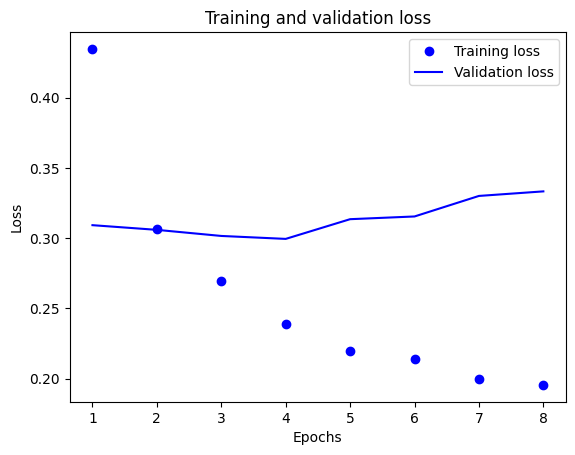

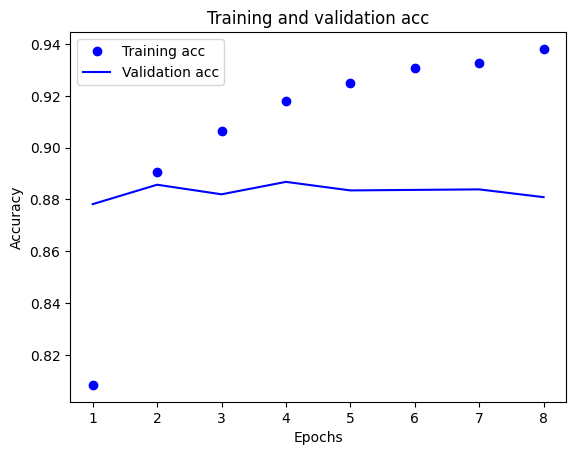


The max validation accuracy of 0.8867999911308289
At Epoch 4
The max validation loss of 0.3333066999912262
At Epoch 8

Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size: 64
Epoch 1/8
235/235 [==============================] - 4s 15ms/step - loss: 0.4401 - accuracy: 0.8103 - val_loss: 0.2864 - val_accuracy: 0.8870
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 0.2552 - accuracy: 0.9064 - val_loss: 0.2807 - val_accuracy: 0.8893
Epoch 3/8
235/235 [==============================] - 2s 8ms/step - loss: 0.1948 - accuracy: 0.9338 - val_loss: 0.3080 - val_accuracy: 0.8879
Epoch 4/8
235/235 [==============================] - 2s 9ms/step - loss: 0.1599 - accuracy: 0.9485 - val_loss: 0.3418 - val_accuracy: 0.8847
Epoch 5/8
235/235 [==============================] - 2s 8ms/step - loss: 0.1409 - accuracy: 0.9551 - val_loss: 0.3740 - val_accuracy: 0.8818
Epoch 6/8
235/235 [==============================] - 2s 7ms/step - loss: 0.1263 - accuracy: 0.9605

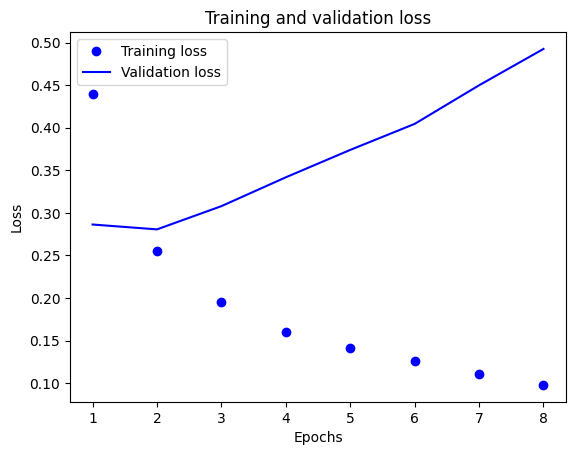

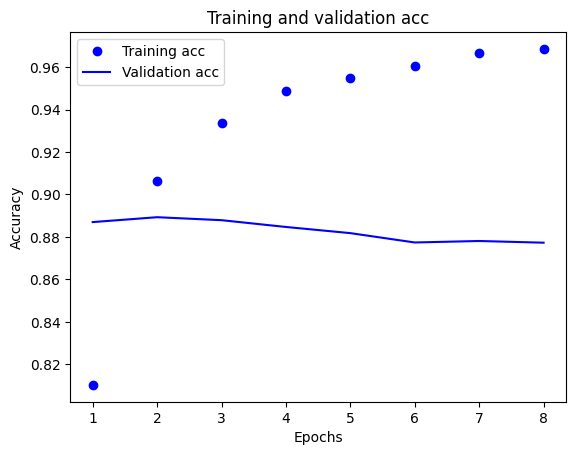


The max validation accuracy of 0.8892999887466431
At Epoch 2
The max validation loss of 0.4926060140132904
At Epoch 8

Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size: 144
Epoch 1/8
105/105 [==============================] - 3s 21ms/step - loss: 0.4995 - accuracy: 0.7771 - val_loss: 0.3410 - val_accuracy: 0.8751
Epoch 2/8
105/105 [==============================] - 1s 10ms/step - loss: 0.3005 - accuracy: 0.8919 - val_loss: 0.3055 - val_accuracy: 0.8705
Epoch 3/8
105/105 [==============================] - 1s 10ms/step - loss: 0.2209 - accuracy: 0.9233 - val_loss: 0.2780 - val_accuracy: 0.8890
Epoch 4/8
105/105 [==============================] - 1s 10ms/step - loss: 0.1692 - accuracy: 0.9432 - val_loss: 0.2989 - val_accuracy: 0.8879
Epoch 5/8
105/105 [==============================] - 1s 9ms/step - loss: 0.1337 - accuracy: 0.9559 - val_loss: 0.3329 - val_accuracy: 0.8869
Epoch 6/8
105/105 [==============================] - 1s 10ms/step - loss: 0.1103 - accuracy: 0

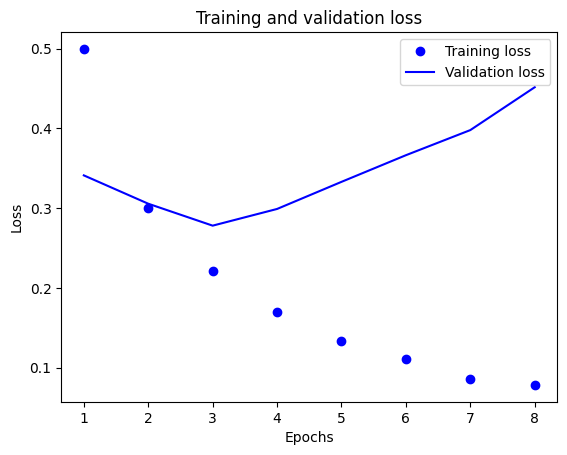

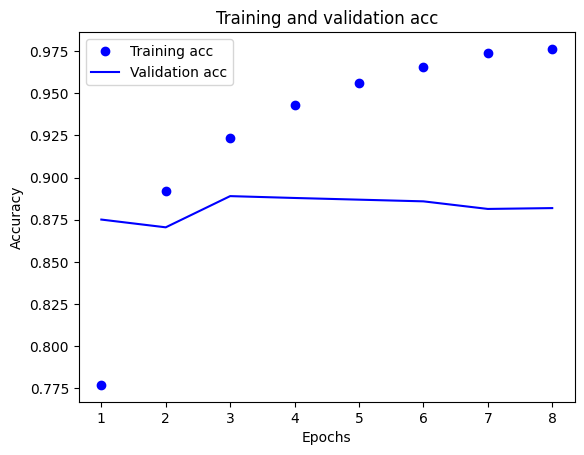


The max validation accuracy of 0.8889999985694885
At Epoch 3
The max validation loss of 0.45152685046195984
At Epoch 8

Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size: 336
Epoch 1/8
45/45 [==============================] - 3s 45ms/step - loss: 0.5547 - accuracy: 0.7363 - val_loss: 0.4193 - val_accuracy: 0.8566
Epoch 2/8
45/45 [==============================] - 1s 18ms/step - loss: 0.3605 - accuracy: 0.8667 - val_loss: 0.3093 - val_accuracy: 0.8823
Epoch 3/8
45/45 [==============================] - 1s 18ms/step - loss: 0.2744 - accuracy: 0.9047 - val_loss: 0.2860 - val_accuracy: 0.8875
Epoch 4/8
45/45 [==============================] - 1s 18ms/step - loss: 0.2216 - accuracy: 0.9245 - val_loss: 0.2899 - val_accuracy: 0.8809
Epoch 5/8
45/45 [==============================] - 1s 17ms/step - loss: 0.1783 - accuracy: 0.9427 - val_loss: 0.2924 - val_accuracy: 0.8879
Epoch 6/8
45/45 [==============================] - 1s 17ms/step - loss: 0.1433 - accuracy: 0.9537 - va

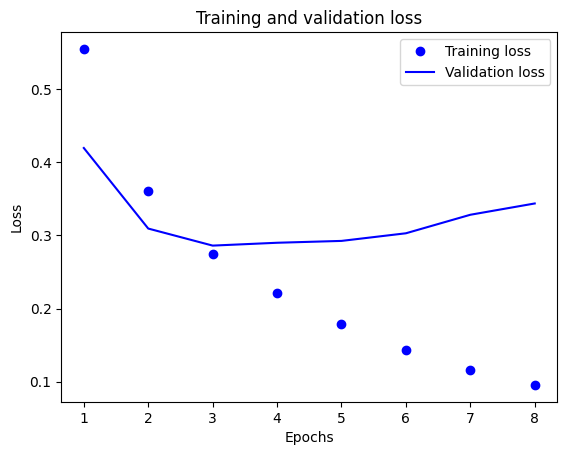

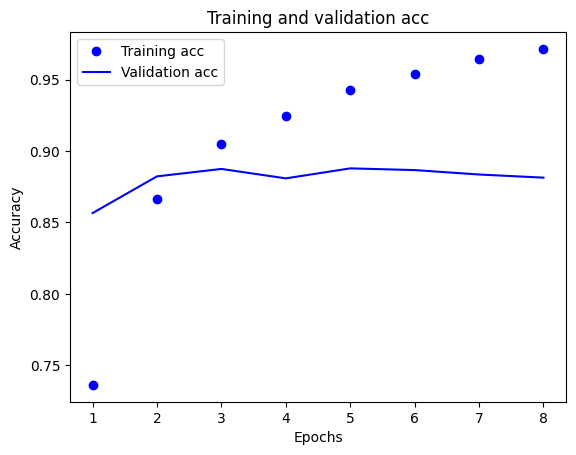


The max validation accuracy of 0.8878999948501587
At Epoch 5
The max validation loss of 0.4193163216114044
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size: 960
Epoch 1/8
16/16 [==============================] - 4s 179ms/step - loss: 0.6380 - accuracy: 0.6429 - val_loss: 0.5458 - val_accuracy: 0.8045
Epoch 2/8
16/16 [==============================] - 1s 45ms/step - loss: 0.5093 - accuracy: 0.7963 - val_loss: 0.4332 - val_accuracy: 0.8674
Epoch 3/8
16/16 [==============================] - 1s 45ms/step - loss: 0.4260 - accuracy: 0.8479 - val_loss: 0.3691 - val_accuracy: 0.8777
Epoch 4/8
16/16 [==============================] - 1s 46ms/step - loss: 0.3662 - accuracy: 0.8721 - val_loss: 0.3395 - val_accuracy: 0.8752
Epoch 5/8
16/16 [==============================] - 1s 47ms/step - loss: 0.3162 - accuracy: 0.8894 - val_loss: 0.3053 - val_accuracy: 0.8869
Epoch 6/8
16/16 [==============================] - 1s 47ms/step - loss: 0.2787 - accuracy: 0.9064 - va

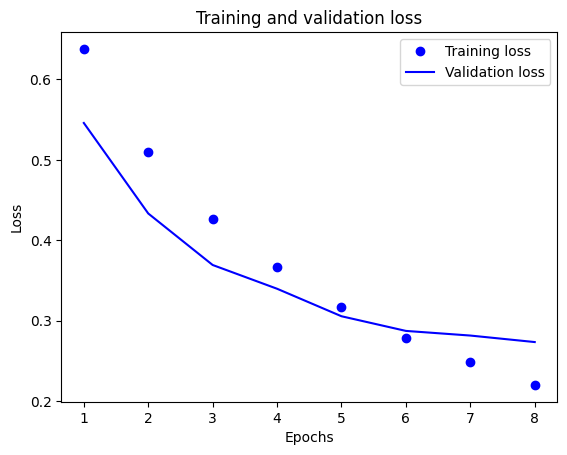

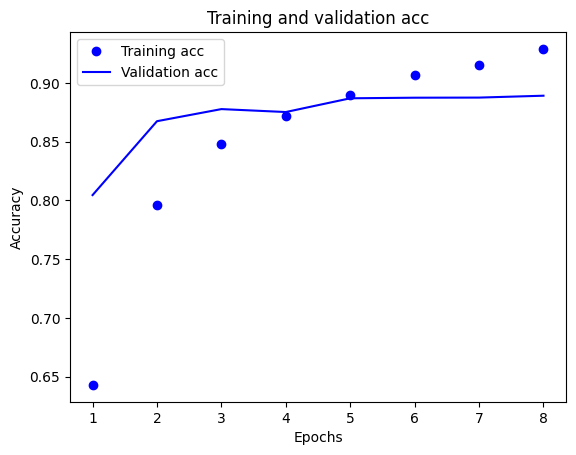


The max validation accuracy of 0.8891000151634216
At Epoch 8
The max validation loss of 0.5458350777626038
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 4s 314ms/step - loss: 0.6545 - accuracy: 0.6242 - val_loss: 0.5775 - val_accuracy: 0.7977
Epoch 2/8
9/9 [==============================] - 1s 103ms/step - loss: 0.5625 - accuracy: 0.7503 - val_loss: 0.4991 - val_accuracy: 0.8453
Epoch 3/8
9/9 [==============================] - 1s 91ms/step - loss: 0.4912 - accuracy: 0.8054 - val_loss: 0.4398 - val_accuracy: 0.8662
Epoch 4/8
9/9 [==============================] - 1s 89ms/step - loss: 0.4477 - accuracy: 0.8273 - val_loss: 0.4051 - val_accuracy: 0.8708
Epoch 5/8
9/9 [==============================] - 1s 119ms/step - loss: 0.4036 - accuracy: 0.8544 - val_loss: 0.3688 - val_accuracy: 0.8797
Epoch 6/8
9/9 [==============================] - 1s 89ms/step - loss: 0.3707 - accuracy: 0.8672 - val_loss: 0

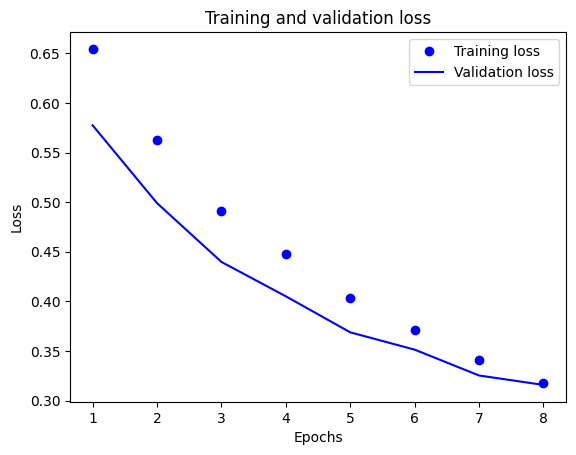

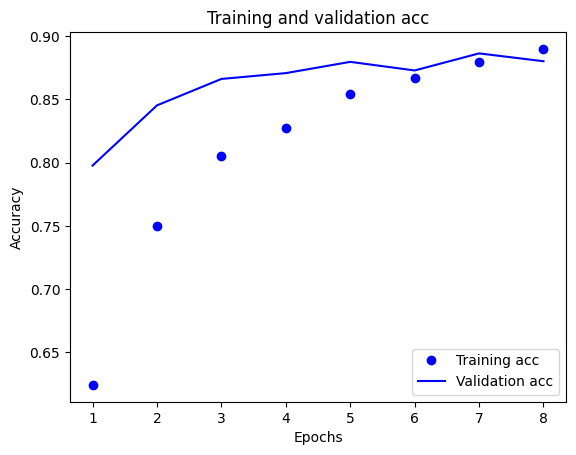


The max validation accuracy of 0.8863999843597412
At Epoch 7
The max validation loss of 0.5775330662727356
At Epoch 1



In [6]:
# I used the same epoch 7 of network 2 as it gave me the best result out of the 3 networks without regularisation or dropout.
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8, droputs on  layer 1 and 2 of 0.25 and batch size:", batch_size)

    # build
    model = build_model_drop(16,16,1,True,True)

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 6 Results:

In experiment 6 I used Drop of 0.25 in layer 1 and layer 2 I used epoch 8 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 64 (2th loop) produced the best validation accuracy of 0.8889999985694885 at Epoch 3 and the worst validation loss was produced by batch 1728 with a result of 0.5775330662727356 At Epoch 1

## NETWORK 7 with High dropout

In [4]:
# Build function with High drop
def build_model_drop(layer1_units, layer2_units,layer3_units, drop, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Dense(layer1_units, activation='relu', input_shape=(10000,)))
    if drop:
      model.add(tf.keras.layers.Dropout(0.75))

    model.add(tf.keras.layers.Dense(layer2_units, activation='relu'))
    if drop:
      model.add(tf.keras.layers.Dropout(0.75))

    model.add(tf.keras.layers.Dense(layer3_units, activation='sigmoid'))
    model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
    )
    return model

Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 15s 7ms/step - loss: 0.6820 - accuracy: 0.5673 - val_loss: 0.6128 - val_accuracy: 0.7646
Epoch 2/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6538 - accuracy: 0.6316 - val_loss: 0.5747 - val_accuracy: 0.7528
Epoch 3/8
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6540 - accuracy: 0.6472 - val_loss: 0.5648 - val_accuracy: 0.7763
Epoch 4/8
1250/1250 [==============================] - 7s 5ms/step - loss: 0.6517 - accuracy: 0.6688 - val_loss: 0.5618 - val_accuracy: 0.7633
Epoch 5/8
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6560 - accuracy: 0.6756 - val_loss: 0.5725 - val_accuracy: 0.7492
Epoch 6/8
1250/1250 [==============================] - 7s 6ms/step - loss: 0.6475 - accuracy: 0.6955 - val_loss: 0.5452 - val_accuracy: 0.7833
Epoch 7/8
1250/1250 [==============================] - 7s 6ms/ste

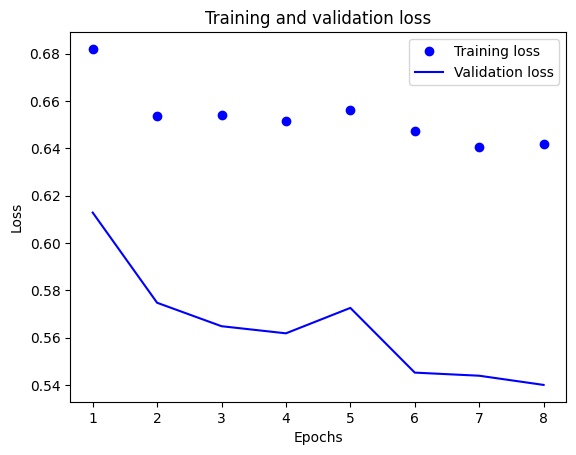

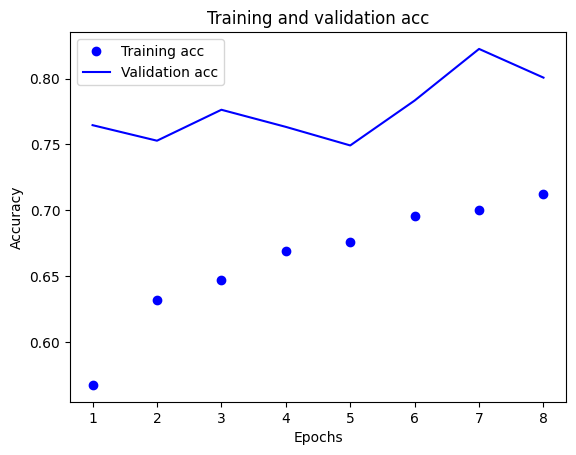


The max validation accuracy of 0.8224999904632568
At Epoch 7
The max validation loss of 0.6128236055374146
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size: 64
Epoch 1/8
235/235 [==============================] - 4s 14ms/step - loss: 0.6730 - accuracy: 0.5614 - val_loss: 0.6135 - val_accuracy: 0.8176
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 0.6116 - accuracy: 0.6519 - val_loss: 0.4861 - val_accuracy: 0.8527
Epoch 3/8
235/235 [==============================] - 2s 8ms/step - loss: 0.5710 - accuracy: 0.6950 - val_loss: 0.4311 - val_accuracy: 0.8647
Epoch 4/8
235/235 [==============================] - 2s 7ms/step - loss: 0.5555 - accuracy: 0.7184 - val_loss: 0.4194 - val_accuracy: 0.8551
Epoch 5/8
235/235 [==============================] - 2s 7ms/step - loss: 0.5363 - accuracy: 0.7375 - val_loss: 0.3907 - val_accuracy: 0.8630
Epoch 6/8
235/235 [==============================] - 2s 7ms/step - loss: 0.5324 - accuracy: 0.7431

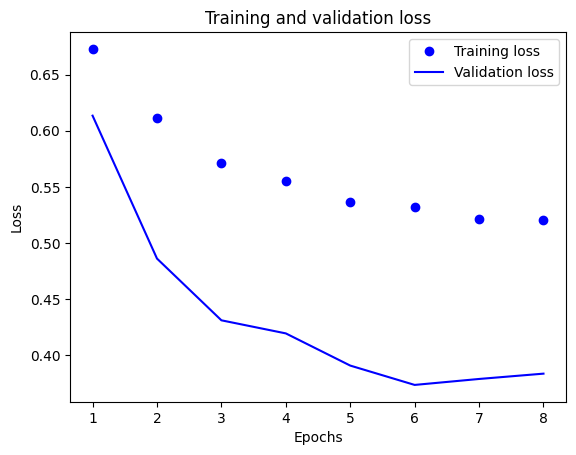

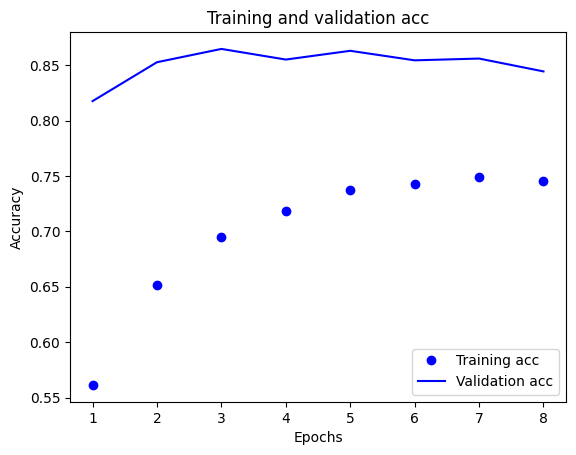


The max validation accuracy of 0.8647000193595886
At Epoch 3
The max validation loss of 0.613472044467926
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size: 144
Epoch 1/8
105/105 [==============================] - 3s 21ms/step - loss: 0.6655 - accuracy: 0.5784 - val_loss: 0.5758 - val_accuracy: 0.8313
Epoch 2/8
105/105 [==============================] - 1s 9ms/step - loss: 0.5859 - accuracy: 0.6649 - val_loss: 0.4655 - val_accuracy: 0.8580
Epoch 3/8
105/105 [==============================] - 1s 9ms/step - loss: 0.5335 - accuracy: 0.7040 - val_loss: 0.3919 - val_accuracy: 0.8724
Epoch 4/8
105/105 [==============================] - 1s 10ms/step - loss: 0.4983 - accuracy: 0.7276 - val_loss: 0.3486 - val_accuracy: 0.8815
Epoch 5/8
105/105 [==============================] - 1s 9ms/step - loss: 0.4777 - accuracy: 0.7346 - val_loss: 0.3217 - val_accuracy: 0.8845
Epoch 6/8
105/105 [==============================] - 1s 9ms/step - loss: 0.4528 - accuracy: 0.761

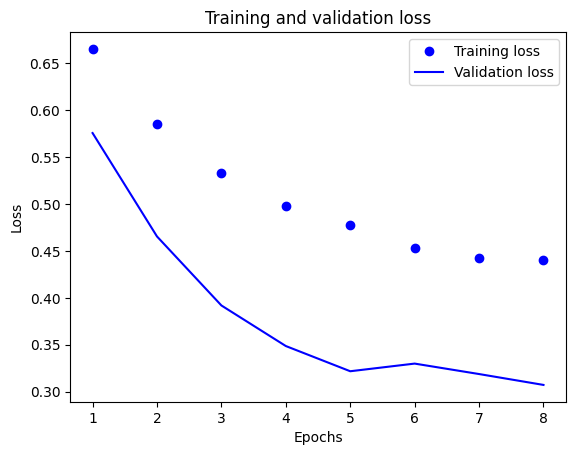

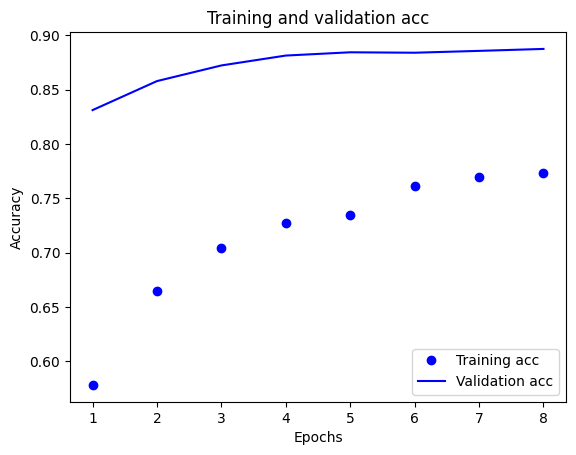


The max validation accuracy of 0.8876000046730042
At Epoch 8
The max validation loss of 0.5757783651351929
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size: 336
Epoch 1/8
45/45 [==============================] - 3s 45ms/step - loss: 0.6738 - accuracy: 0.5807 - val_loss: 0.6297 - val_accuracy: 0.7050
Epoch 2/8
45/45 [==============================] - 1s 18ms/step - loss: 0.6234 - accuracy: 0.6755 - val_loss: 0.5645 - val_accuracy: 0.8305
Epoch 3/8
45/45 [==============================] - 1s 17ms/step - loss: 0.5799 - accuracy: 0.7184 - val_loss: 0.5033 - val_accuracy: 0.8594
Epoch 4/8
45/45 [==============================] - 1s 17ms/step - loss: 0.5461 - accuracy: 0.7425 - val_loss: 0.4590 - val_accuracy: 0.8653
Epoch 5/8
45/45 [==============================] - 1s 17ms/step - loss: 0.5200 - accuracy: 0.7571 - val_loss: 0.4154 - val_accuracy: 0.8771
Epoch 6/8
45/45 [==============================] - 1s 16ms/step - loss: 0.4998 - accuracy: 0.7746 - val

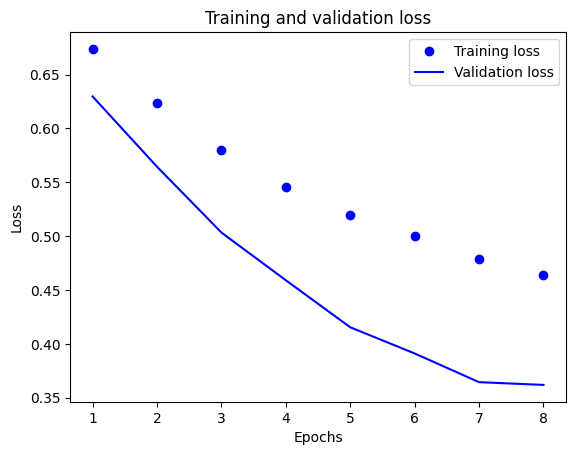

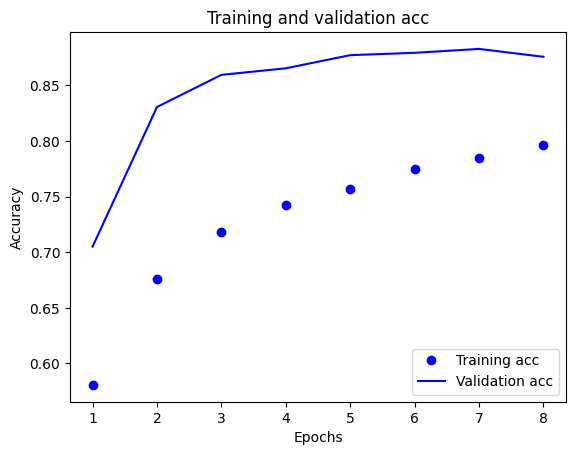


The max validation accuracy of 0.8827000260353088
At Epoch 7
The max validation loss of 0.6296893358230591
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size: 960
Epoch 1/8
16/16 [==============================] - 3s 125ms/step - loss: 0.6921 - accuracy: 0.5443 - val_loss: 0.6689 - val_accuracy: 0.6997
Epoch 2/8
16/16 [==============================] - 1s 47ms/step - loss: 0.6628 - accuracy: 0.6157 - val_loss: 0.6088 - val_accuracy: 0.7560
Epoch 3/8
16/16 [==============================] - 1s 50ms/step - loss: 0.6312 - accuracy: 0.6628 - val_loss: 0.5739 - val_accuracy: 0.8109
Epoch 4/8
16/16 [==============================] - 1s 46ms/step - loss: 0.6083 - accuracy: 0.6894 - val_loss: 0.5477 - val_accuracy: 0.8380
Epoch 5/8
16/16 [==============================] - 1s 46ms/step - loss: 0.5823 - accuracy: 0.7207 - val_loss: 0.5147 - val_accuracy: 0.8565
Epoch 6/8
16/16 [==============================] - 1s 45ms/step - loss: 0.5581 - accuracy: 0.7499 - va

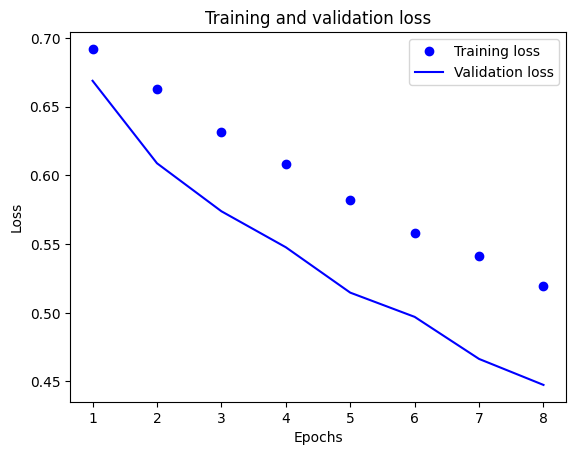

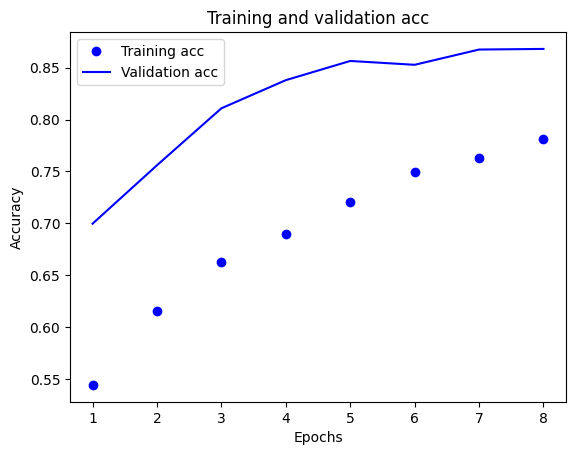


The max validation accuracy of 0.8680999875068665
At Epoch 8
The max validation loss of 0.6688587665557861
At Epoch 1

Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 4s 276ms/step - loss: 0.6955 - accuracy: 0.5113 - val_loss: 0.6802 - val_accuracy: 0.6621
Epoch 2/8
9/9 [==============================] - 1s 88ms/step - loss: 0.6762 - accuracy: 0.5645 - val_loss: 0.6509 - val_accuracy: 0.7738
Epoch 3/8
9/9 [==============================] - 1s 86ms/step - loss: 0.6509 - accuracy: 0.6027 - val_loss: 0.6113 - val_accuracy: 0.8227
Epoch 4/8
9/9 [==============================] - 1s 95ms/step - loss: 0.6306 - accuracy: 0.6176 - val_loss: 0.5651 - val_accuracy: 0.8448
Epoch 5/8
9/9 [==============================] - 1s 89ms/step - loss: 0.6056 - accuracy: 0.6503 - val_loss: 0.5424 - val_accuracy: 0.8508
Epoch 6/8
9/9 [==============================] - 1s 88ms/step - loss: 0.5844 - accuracy: 0.6645 - val_loss: 0.5

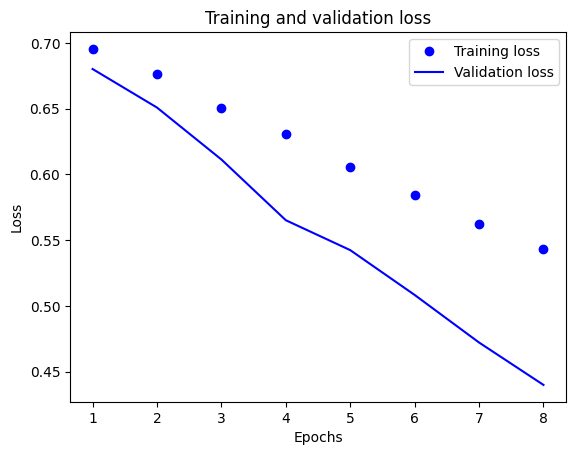

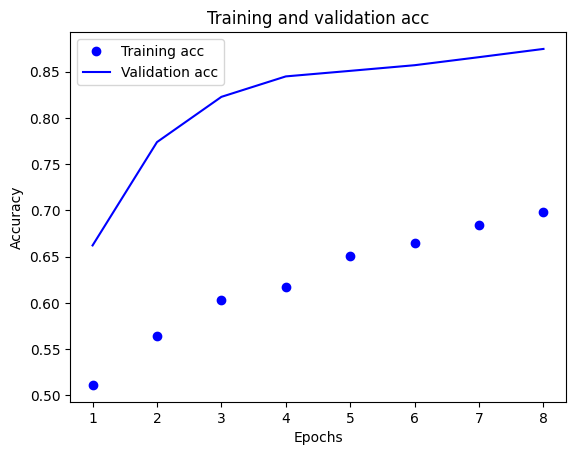


The max validation accuracy of 0.8744999766349792
At Epoch 8
The max validation loss of 0.6801914572715759
At Epoch 1



In [5]:
# I used the same epoch 7 of network 2 as it gave me the best result out of the 3 networks without regularisation or dropout.
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8, droputs on  layer 1 and 2 of 0.75 and batch size:", batch_size)

    # build
    model = build_model_drop(16,16,1,True,True)

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 7 Results:

In experiment 7 I used Drop of 0.75 in layer 1 and layer 2 I used epoch 8 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 144 (3th loop) produced the best validation accuracy of 0.8876000046730042 at Epoch 8 and the worst validation loss was produced by batch 1728 with a result of 0.6801914572715759 At Epoch 1

## Network 8 With Regularisation and Dropout

In [4]:
# Build function with Low drop and 0.008 Reg
def build_model_drop_and_reg(layers=[11,44,77], reg=True, dropout_rate = 0.25, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.008) if reg else None, activation='relu', input_shape=(10000,)))

    for l in layers:
        model.add(tf.keras.layers.Dense(l,activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
    )
    return model

Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 17s 7ms/step - loss: 2.3387 - accuracy: 0.7410 - val_loss: 0.4077 - val_accuracy: 0.8599
Epoch 2/8
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2599 - accuracy: 0.7732 - val_loss: 0.4904 - val_accuracy: 0.8088
Epoch 3/8
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3112 - accuracy: 0.7694 - val_loss: 0.4828 - val_accuracy: 0.8211
Epoch 4/8
1250/1250 [==============================] - 7s 6ms/step - loss: 2.2355 - accuracy: 0.7785 - val_loss: 0.4442 - val_accuracy: 0.8449
Epoch 5/8
1250/1250 [==============================] - 7s 6ms/step - loss: 2.1687 - accuracy: 0.7831 - val_loss: 0.3948 - val_accuracy: 0.8570
Epoch 6/8
1250/1250 [==============================] - 8s 6ms/step - loss: 2.2299 - accuracy: 0.7811 - val_loss: 0.3666 - val_accuracy: 0.8615
Epoch 7/8
1250/1250 [==============================] - 7s 6ms

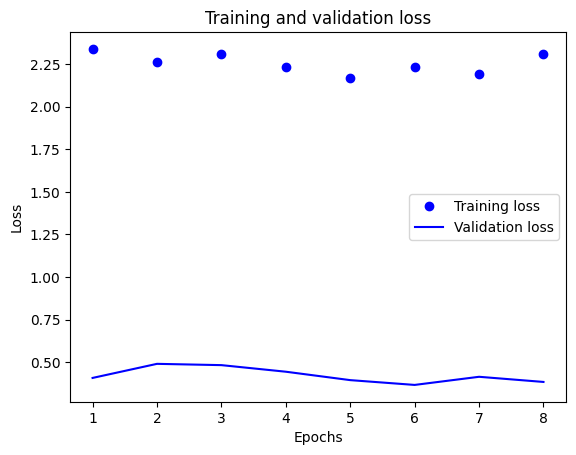

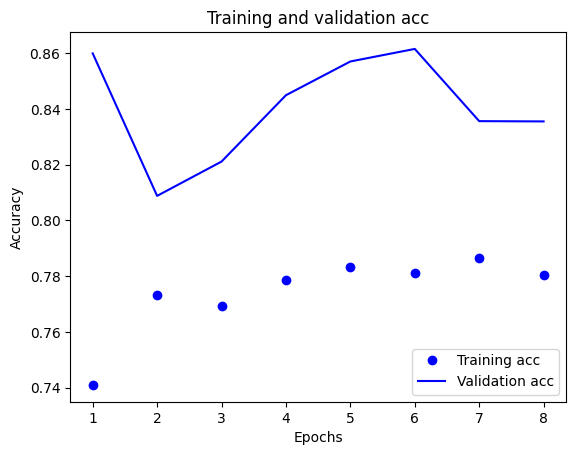


The max validation accuracy of 0.8615000247955322
At Epoch 6
The max validation loss of 0.49036622047424316
At Epoch 2

Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size: 64
Epoch 1/8
235/235 [==============================] - 4s 13ms/step - loss: 2.2692 - accuracy: 0.7443 - val_loss: 0.4148 - val_accuracy: 0.8745
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 2.2064 - accuracy: 0.7853 - val_loss: 0.4920 - val_accuracy: 0.8182
Epoch 3/8
235/235 [==============================] - 2s 9ms/step - loss: 2.1925 - accuracy: 0.7953 - val_loss: 0.4233 - val_accuracy: 0.8673
Epoch 4/8
235/235 [==============================] - 2s 10ms/step - loss: 2.1557 - accuracy: 0.7989 - val_loss: 0.4357 - val_accuracy: 0.8597
Epoch 5/8
235/235 [==============================] - 2s 8ms/step - loss: 2.1420 - accuracy: 0.8043 - val_loss: 0.4181 - val_accuracy: 0.8748
Epoch 6/8
235/235 [==============================] - 2s 7ms/step - loss: 2.1888 - accuracy: 

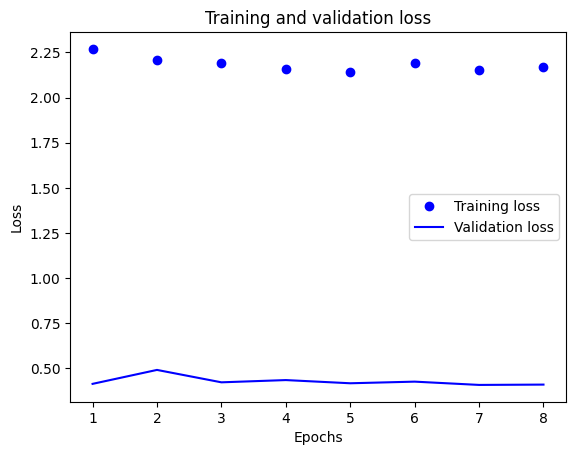

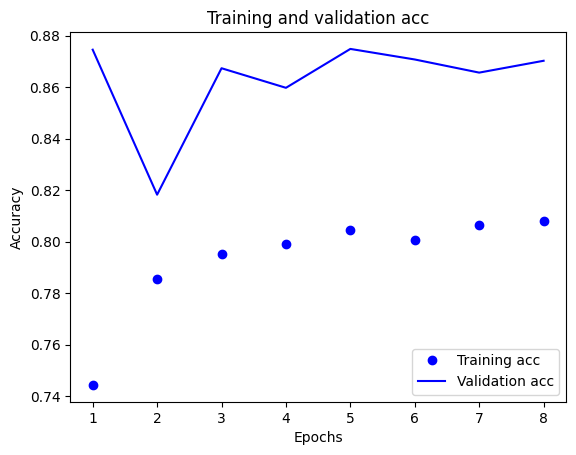


The max validation accuracy of 0.8748000264167786
At Epoch 5
The max validation loss of 0.4919852018356323
At Epoch 2

Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size: 144
Epoch 1/8
105/105 [==============================] - 5s 27ms/step - loss: 2.3829 - accuracy: 0.6556 - val_loss: 0.4121 - val_accuracy: 0.8619
Epoch 2/8
105/105 [==============================] - 1s 10ms/step - loss: 2.2231 - accuracy: 0.7865 - val_loss: 0.4330 - val_accuracy: 0.8520
Epoch 3/8
105/105 [==============================] - 1s 13ms/step - loss: 2.1415 - accuracy: 0.8022 - val_loss: 0.5325 - val_accuracy: 0.8079
Epoch 4/8
105/105 [==============================] - 1s 10ms/step - loss: 2.2235 - accuracy: 0.8030 - val_loss: 0.3905 - val_accuracy: 0.8752
Epoch 5/8
105/105 [==============================] - 1s 13ms/step - loss: 2.1390 - accuracy: 0.8070 - val_loss: 0.4178 - val_accuracy: 0.8649
Epoch 6/8
105/105 [==============================] - 1s 10ms/step - loss: 2.1903 - accura

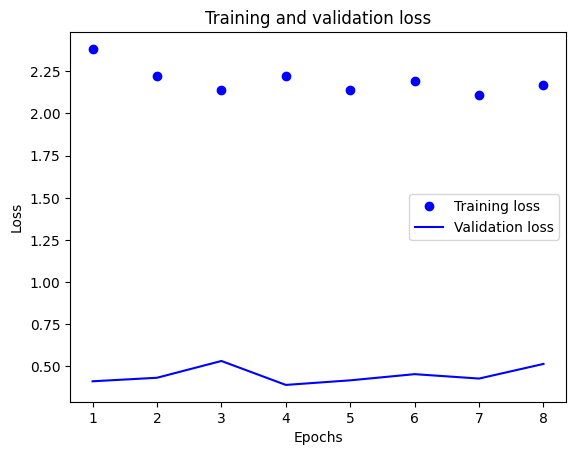

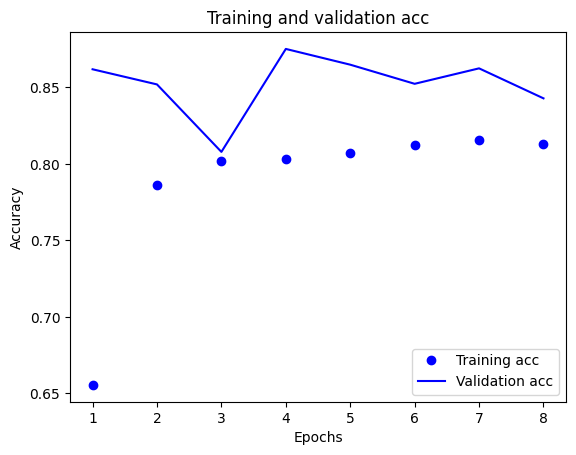


The max validation accuracy of 0.8751999735832214
At Epoch 4
The max validation loss of 0.5325243473052979
At Epoch 3

Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size: 336
Epoch 1/8
45/45 [==============================] - 4s 51ms/step - loss: 2.3705 - accuracy: 0.7027 - val_loss: 0.5531 - val_accuracy: 0.8006
Epoch 2/8
45/45 [==============================] - 1s 17ms/step - loss: 2.1995 - accuracy: 0.7871 - val_loss: 0.4315 - val_accuracy: 0.8604
Epoch 3/8
45/45 [==============================] - 1s 18ms/step - loss: 2.1659 - accuracy: 0.7999 - val_loss: 0.4857 - val_accuracy: 0.8313
Epoch 4/8
45/45 [==============================] - 1s 18ms/step - loss: 2.1273 - accuracy: 0.8132 - val_loss: 0.4238 - val_accuracy: 0.8694
Epoch 5/8
45/45 [==============================] - 1s 18ms/step - loss: 2.2462 - accuracy: 0.8069 - val_loss: 0.4150 - val_accuracy: 0.8773
Epoch 6/8
45/45 [==============================] - 1s 19ms/step - loss: 2.1563 - accuracy: 0.8149 -

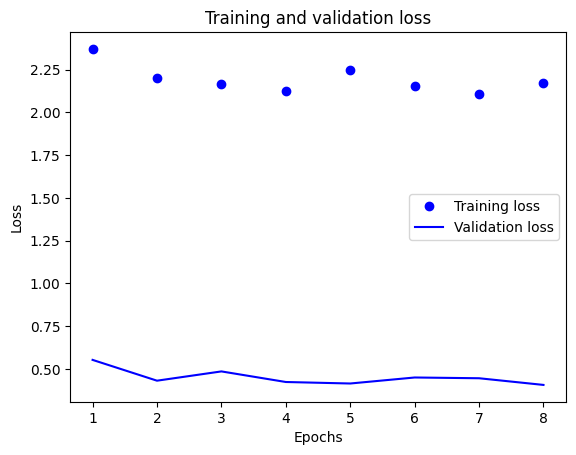

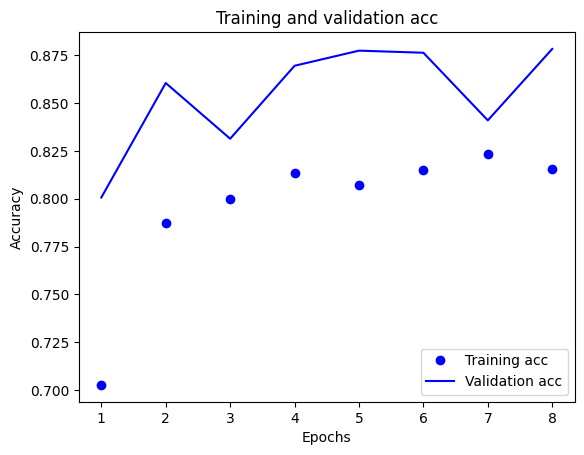


The max validation accuracy of 0.8781999945640564
At Epoch 8
The max validation loss of 0.5530673265457153
At Epoch 1

Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size: 960
Epoch 1/8
16/16 [==============================] - 4s 175ms/step - loss: 2.5743 - accuracy: 0.5685 - val_loss: 0.7019 - val_accuracy: 0.5572
Epoch 2/8
16/16 [==============================] - 1s 66ms/step - loss: 2.3534 - accuracy: 0.7294 - val_loss: 0.5236 - val_accuracy: 0.7868
Epoch 3/8
16/16 [==============================] - 1s 44ms/step - loss: 2.1844 - accuracy: 0.7825 - val_loss: 0.4264 - val_accuracy: 0.8556
Epoch 4/8
16/16 [==============================] - 1s 46ms/step - loss: 2.2586 - accuracy: 0.7885 - val_loss: 0.4168 - val_accuracy: 0.8586
Epoch 5/8
16/16 [==============================] - 1s 45ms/step - loss: 2.1985 - accuracy: 0.8093 - val_loss: 0.5880 - val_accuracy: 0.7496
Epoch 6/8
16/16 [==============================] - 1s 48ms/step - loss: 2.1160 - accuracy: 0.8181 

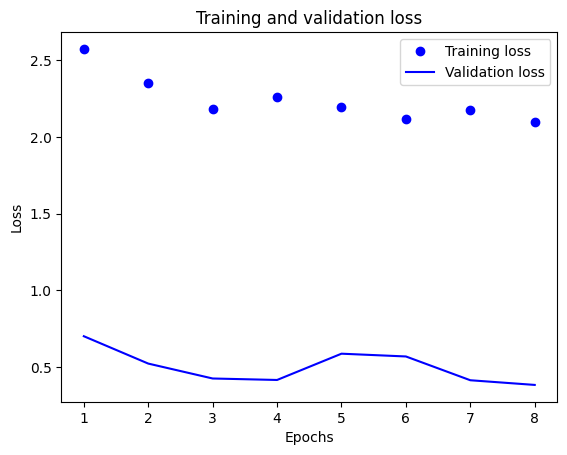

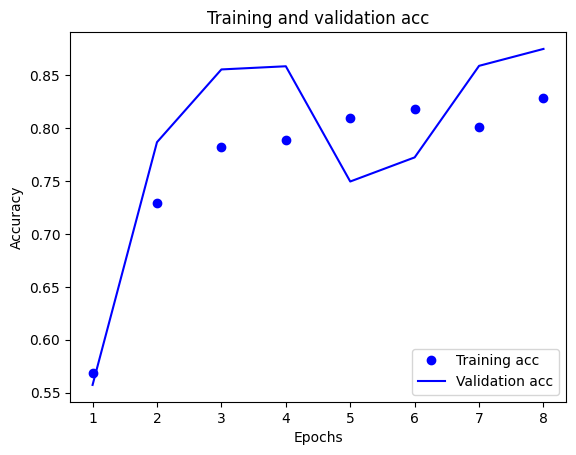


The max validation accuracy of 0.875
At Epoch 8
The max validation loss of 0.701898455619812
At Epoch 1

Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 3s 232ms/step - loss: 2.6002 - accuracy: 0.5699 - val_loss: 0.7676 - val_accuracy: 0.4947
Epoch 2/8
9/9 [==============================] - 1s 138ms/step - loss: 2.3867 - accuracy: 0.6987 - val_loss: 0.6682 - val_accuracy: 0.5634
Epoch 3/8
9/9 [==============================] - 1s 145ms/step - loss: 2.3499 - accuracy: 0.7482 - val_loss: 0.5510 - val_accuracy: 0.8258
Epoch 4/8
9/9 [==============================] - 1s 125ms/step - loss: 2.2794 - accuracy: 0.7675 - val_loss: 0.5616 - val_accuracy: 0.7447
Epoch 5/8
9/9 [==============================] - 1s 115ms/step - loss: 2.1664 - accuracy: 0.7852 - val_loss: 0.4297 - val_accuracy: 0.8656
Epoch 6/8
9/9 [==============================] - 1s 83ms/step - loss: 2.1691 - accuracy: 0.7860 - val_loss: 0.4251 - 

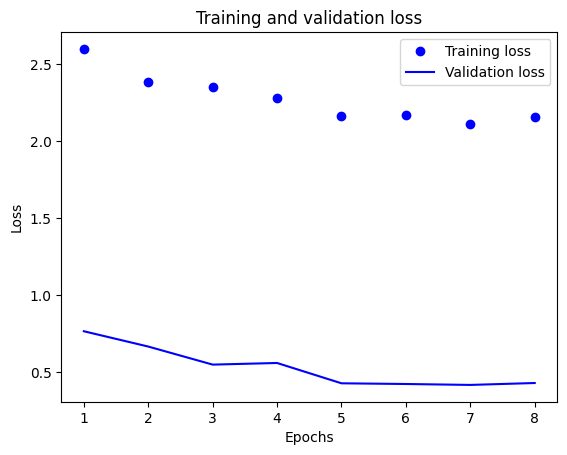

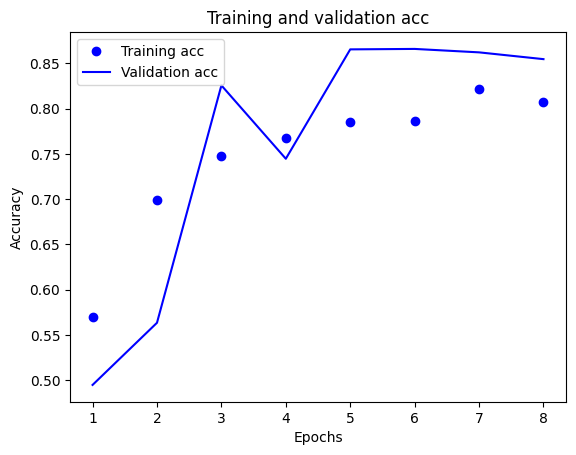


The max validation accuracy of 0.866100013256073
At Epoch 6
The max validation loss of 0.7676300406455994
At Epoch 1



In [5]:
# I used the same epoch 7 of network 2 as it gave me the best result out of the 3 networks without regularisation or dropout.
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8, droputs on layers = 0.25,reg of 0.008 and batch size:", batch_size)

    # build
    model = build_model_drop_and_reg()

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 8 Results:

In experiment 8 I used Drop of 0.25 and regularisation of 0.008 in layer 1  I used epoch 8 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 336 (4th loop) produced the best validation accuracy of 0.8781999945640564 at Epoch 8 and the worst validation loss was produced by batch 1728 with a result of 0.7676300406455994 At Epoch 1

## NETWORK 9 With Regularisation and Dropout



In [4]:
# Build function with High drop and 0.015 Reg
def build_model_drop_and_reg(layers=[11,44,77], reg=True, dropout_rate = 0.75, clear=True):
    if clear:
        tf.keras.backend.clear_session()
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.015) if reg else None, activation='relu', input_shape=(10000,)))

    for l in layers:
        model.add(tf.keras.layers.Dense(l,activation='relu'))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.compile(
      optimizer='rmsprop',
      loss='binary_crossentropy',
      metrics=['accuracy']
    )
    return model

Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size: 12
Epoch 1/8
1250/1250 [==============================] - 18s 7ms/step - loss: 7.6293 - accuracy: 0.5041 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/8
1250/1250 [==============================] - 7s 6ms/step - loss: 7.7273 - accuracy: 0.4976 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/8
1250/1250 [==============================] - 7s 5ms/step - loss: 7.6383 - accuracy: 0.5034 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/8
1250/1250 [==============================] - 7s 6ms/step - loss: 7.6999 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/8
1250/1250 [==============================] - 10s 8ms/step - loss: 7.6771 - accuracy: 0.5009 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/8
1250/1250 [==============================] - 6s 5ms/step - loss: 7.6808 - accuracy: 0.5006 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/8
1250/1250 [==============================] - 7s 6m

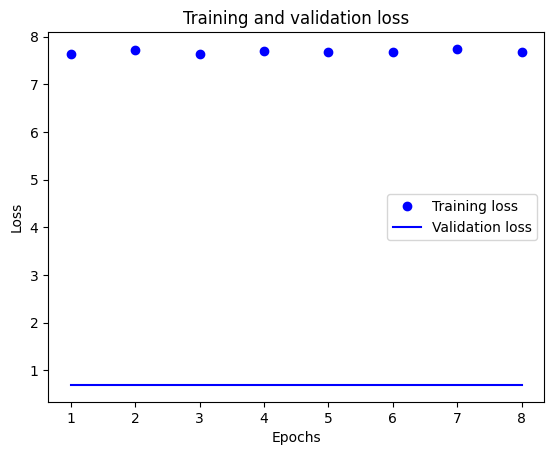

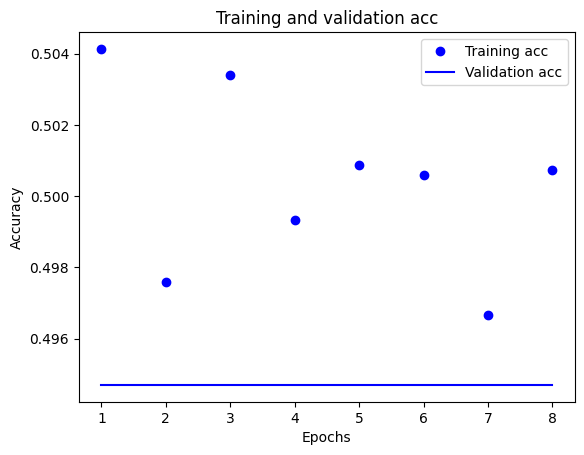


The max validation accuracy of 0.49470001459121704
At Epoch 1
The max validation loss of 0.693152904510498
At Epoch 1

Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size: 64
Epoch 1/8
235/235 [==============================] - 5s 14ms/step - loss: 7.7016 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 2/8
235/235 [==============================] - 2s 7ms/step - loss: 7.5694 - accuracy: 0.5079 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 3/8
235/235 [==============================] - 2s 7ms/step - loss: 7.6523 - accuracy: 0.5025 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 4/8
235/235 [==============================] - 2s 8ms/step - loss: 7.6587 - accuracy: 0.5021 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 5/8
235/235 [==============================] - 2s 7ms/step - loss: 7.7116 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 6/8
235/235 [==============================] - 2s 7ms/step - loss: 7.6981 - accuracy: 0.

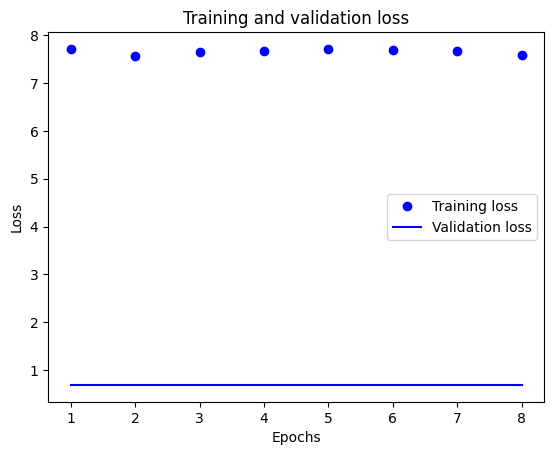

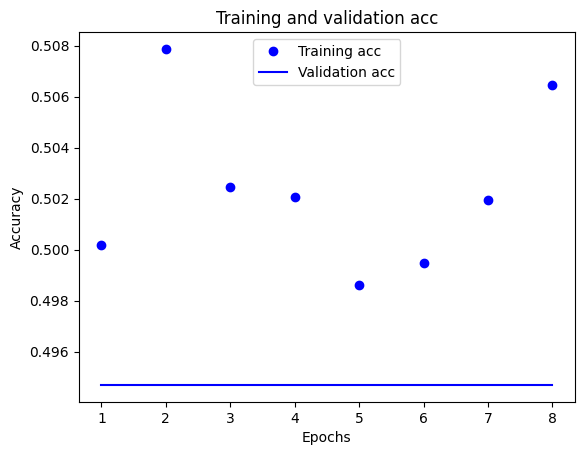


The max validation accuracy of 0.49470001459121704
At Epoch 1
The max validation loss of 0.6931461691856384
At Epoch 1

Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size: 144
Epoch 1/8
105/105 [==============================] - 4s 21ms/step - loss: 7.6728 - accuracy: 0.5033 - val_loss: 0.6931 - val_accuracy: 0.5056
Epoch 2/8
105/105 [==============================] - 2s 14ms/step - loss: 7.6226 - accuracy: 0.5044 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 3/8
105/105 [==============================] - 1s 12ms/step - loss: 7.6903 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 4/8
105/105 [==============================] - 1s 13ms/step - loss: 7.6985 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 5/8
105/105 [==============================] - 1s 9ms/step - loss: 7.6964 - accuracy: 0.4996 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 6/8
105/105 [==============================] - 1s 10ms/step - loss: 7.6757 - accura

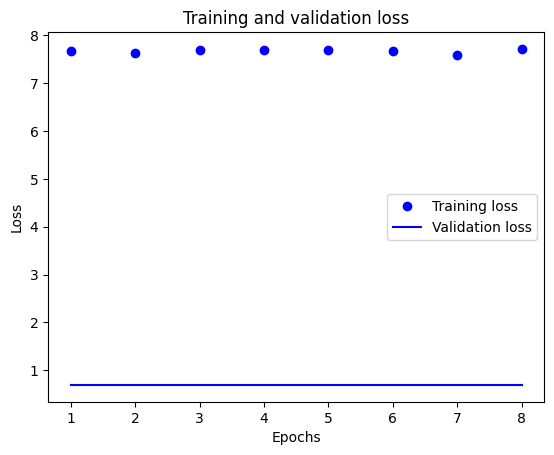

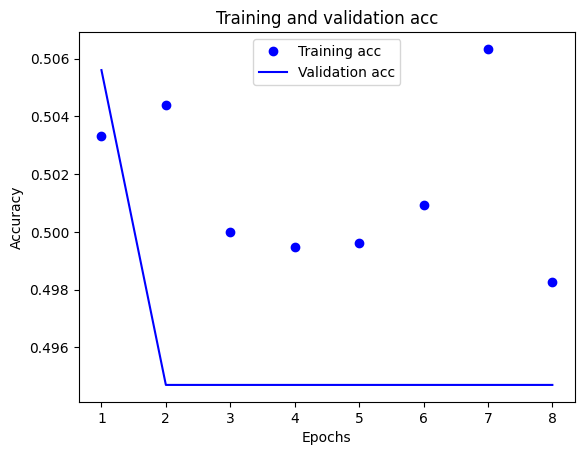


The max validation accuracy of 0.5055999755859375
At Epoch 1
The max validation loss of 0.6931465864181519
At Epoch 1

Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size: 336
Epoch 1/8
45/45 [==============================] - 3s 44ms/step - loss: 7.7396 - accuracy: 0.5018 - val_loss: 0.6935 - val_accuracy: 0.5075
Epoch 2/8
45/45 [==============================] - 1s 18ms/step - loss: 7.6728 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5079
Epoch 3/8
45/45 [==============================] - 1s 29ms/step - loss: 7.6655 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5179
Epoch 4/8
45/45 [==============================] - 1s 29ms/step - loss: 7.5983 - accuracy: 0.5060 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 5/8
45/45 [==============================] - 1s 21ms/step - loss: 7.7068 - accuracy: 0.4989 - val_loss: 0.6931 - val_accuracy: 0.4947
Epoch 6/8
45/45 [==============================] - 1s 17ms/step - loss: 7.7005 - accuracy: 0.4993 -

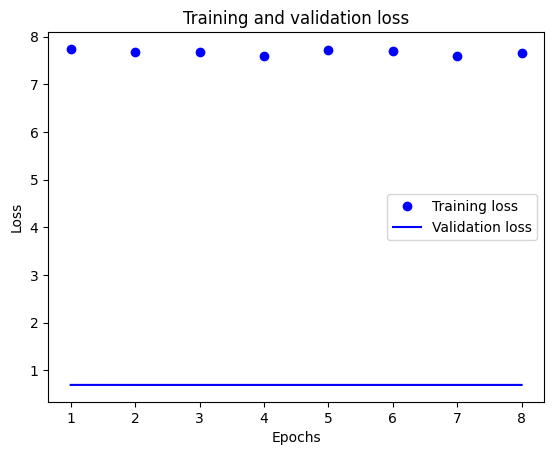

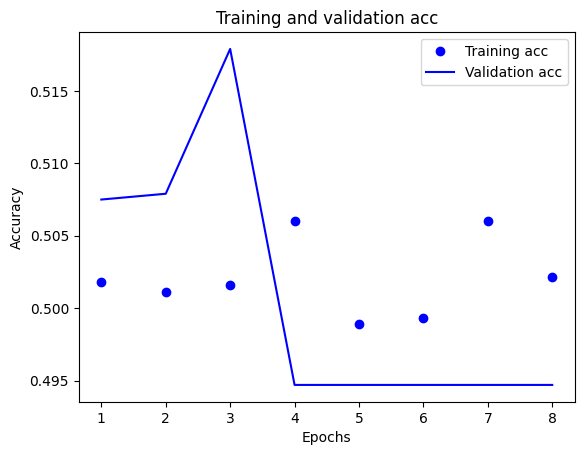


The max validation accuracy of 0.5178999900817871
At Epoch 3
The max validation loss of 0.6934679746627808
At Epoch 1

Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size: 960
Epoch 1/8
16/16 [==============================] - 3s 123ms/step - loss: 7.8586 - accuracy: 0.5019 - val_loss: 0.7408 - val_accuracy: 0.5003
Epoch 2/8
16/16 [==============================] - 1s 46ms/step - loss: 7.7467 - accuracy: 0.4976 - val_loss: 0.6968 - val_accuracy: 0.4975
Epoch 3/8
16/16 [==============================] - 1s 48ms/step - loss: 7.6298 - accuracy: 0.5040 - val_loss: 0.6933 - val_accuracy: 0.4965
Epoch 4/8
16/16 [==============================] - 1s 48ms/step - loss: 7.7028 - accuracy: 0.4992 - val_loss: 0.6932 - val_accuracy: 0.4961
Epoch 5/8
16/16 [==============================] - 1s 72ms/step - loss: 7.7579 - accuracy: 0.4957 - val_loss: 0.6931 - val_accuracy: 0.4959
Epoch 6/8
16/16 [==============================] - 1s 82ms/step - loss: 7.7470 - accuracy: 0.4963 

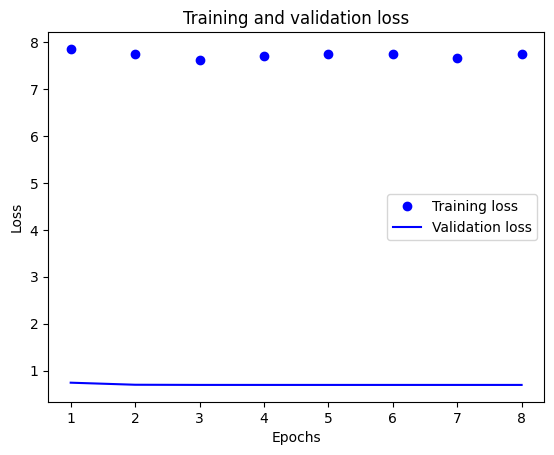

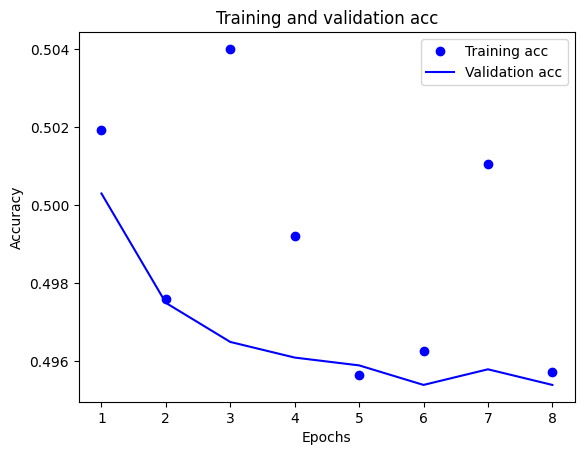


The max validation accuracy of 0.5002999901771545
At Epoch 1
The max validation loss of 0.7408311367034912
At Epoch 1

Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size: 1728
Epoch 1/8
9/9 [==============================] - 4s 266ms/step - loss: 7.9211 - accuracy: 0.5034 - val_loss: 0.8204 - val_accuracy: 0.5103
Epoch 2/8
9/9 [==============================] - 1s 126ms/step - loss: 7.6815 - accuracy: 0.5057 - val_loss: 0.7287 - val_accuracy: 0.5067
Epoch 3/8
9/9 [==============================] - 1s 85ms/step - loss: 7.7071 - accuracy: 0.5003 - val_loss: 0.7018 - val_accuracy: 0.5064
Epoch 4/8
9/9 [==============================] - 1s 103ms/step - loss: 7.6110 - accuracy: 0.5055 - val_loss: 0.6950 - val_accuracy: 0.5060
Epoch 5/8
9/9 [==============================] - 1s 117ms/step - loss: 7.6197 - accuracy: 0.5047 - val_loss: 0.6935 - val_accuracy: 0.5060
Epoch 6/8
9/9 [==============================] - 1s 144ms/step - loss: 7.6061 - accuracy: 0.5055 - val_l

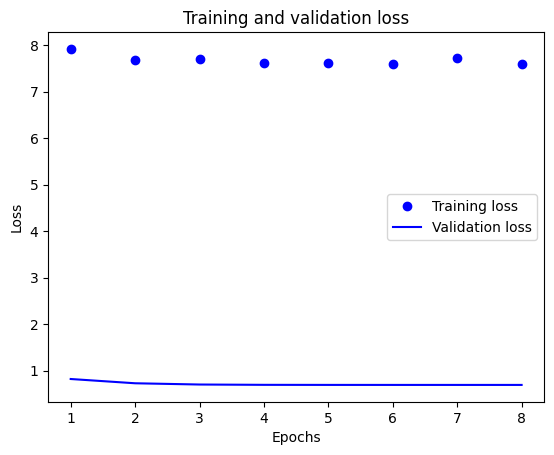

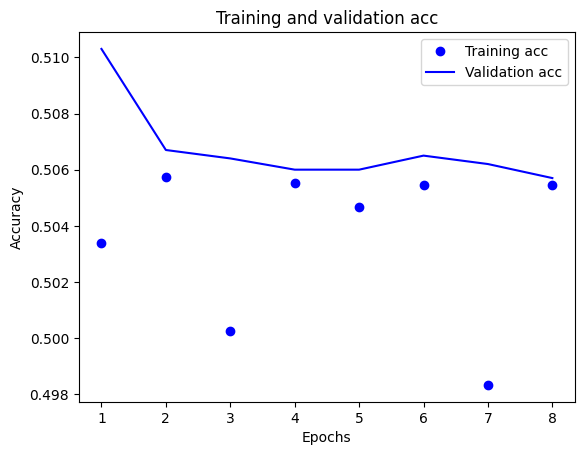


The max validation accuracy of 0.5102999806404114
At Epoch 1
The max validation loss of 0.8203943371772766
At Epoch 1



In [5]:
# I used the same epoch 7 of network 2 as it gave me the best result out of the 3 networks without regularisation or dropout.
for batch_size in [12, 64, 144, 336, 960, 1728]:

    print("Training with epoch 8, droputs on layers = 0.75,reg of 0.015 and batch size:", batch_size)

    # build
    model = build_model_drop_and_reg()

    # save data from training into the 'history' object
    history = model.fit(
        partial_x_train,
        partial_y_train,
        epochs=8,
        batch_size=batch_size,
        validation_data=(x_val, y_val),
    )

    plot_history(history)
    print()
    print("The max validation accuracy of", np.max(history.history["val_accuracy"]))
    print("At Epoch", np.argmax(history.history["val_accuracy"]) + 1)
    print("The max validation loss of", np.max(history.history["val_loss"]))
    print("At Epoch", np.argmax(history.history["val_loss"]) + 1)
    print("=" * 40)
    print()


## Experiment 9 Results:

In experiment 9 I used Drop of 0.75 and regularisation of 0.008 in layer 1  I used epoch 8 with a bacth of 12, 64, 144, 336, 960, 1728 and determined using the validation accuracy and loss that the bach size of 336 (4th loop) produced the best validation accuracy of 0.5178999900817871 at Epoch 3 and the worst validation loss was produced by batch 1728 with a result of 0.8203943371772766 At Epoch 1

## 3. Conclusion

Take your best network and train on **all the training data** (`x_train`, `y_train`), without a train/validation split, using the same hyperparameters (optimizer, learning rate, network size, etc.) as your best run, for the optimal number of epochs (looking at your best validation curves).

## In conclusion:

The best network was network 2 as it gave the best accuracy validation at bach size of 960 (4th model)produced the best accuracy validation of  0.8934000134468079 at Epoch 3

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=8,
    batch_size=960,
)

Epoch 1/8
27/27 [==============================] - 6s 25ms/step - loss: 0.5667 - accuracy: 0.7380
Epoch 2/8
27/27 [==============================] - 1s 26ms/step - loss: 0.3770 - accuracy: 0.8818
Epoch 3/8
27/27 [==============================] - 1s 27ms/step - loss: 0.2929 - accuracy: 0.9045
Epoch 4/8
27/27 [==============================] - 1s 24ms/step - loss: 0.2420 - accuracy: 0.9174
Epoch 5/8
27/27 [==============================] - 1s 30ms/step - loss: 0.2126 - accuracy: 0.9275
Epoch 6/8
27/27 [==============================] - 1s 38ms/step - loss: 0.1870 - accuracy: 0.9364
Epoch 7/8
27/27 [==============================] - 1s 38ms/step - loss: 0.1741 - accuracy: 0.9394
Epoch 8/8
27/27 [==============================] - 1s 26ms/step - loss: 0.1606 - accuracy: 0.9441


Evaluate this last model on the test set (`x_test, y_test`).

In [ ]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2919 - accuracy: 0.8845


[0.29193949699401855, 0.8845199942588806]

### Use your model (optional)

Can you import the lecture code used to test the model on a review, and see if you agree with its prediction?

## I will be using a MNIST fashion model (External Data set)

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [6]:
# MNIST

# load
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# preprocess
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels_one_hot = tf.keras.utils.to_categorical(train_labels)
test_labels_one_hot = tf.keras.utils.to_categorical(test_labels)

In [7]:
train_labels[0], train_labels_one_hot[0]

(9, array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32))

In [9]:
# build
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
network.evaluate(test_images,test_labels_one_hot)

313/313 [==============================] - 4s 3ms/step - loss: 2.4730 - accuracy: 0.1278


[2.4729795455932617, 0.12780000269412994]

## The common sense baseline is 0.13% accuracy

In [13]:
# build
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=40,
    batch_size=128
)

Epoch 1/40
469/469 [==============================] - 2s 3ms/step - loss: 0.5642 - accuracy: 0.8003
Epoch 2/40
469/469 [==============================] - 2s 3ms/step - loss: 0.3858 - accuracy: 0.8585
Epoch 3/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3424 - accuracy: 0.8734
Epoch 4/40
469/469 [==============================] - 2s 4ms/step - loss: 0.3125 - accuracy: 0.8849
Epoch 5/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2942 - accuracy: 0.8906
Epoch 6/40
469/469 [==============================] - 1s 3ms/step - loss: 0.2791 - accuracy: 0.8965
Epoch 7/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2658 - accuracy: 0.9009
Epoch 8/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2541 - accuracy: 0.9048
Epoch 9/40
469/469 [==============================] - 2s 4ms/step - loss: 0.2447 - accuracy: 0.9095
Epoch 10/40
469/469 [==============================] - 2s 3ms/step - loss: 0.2343 - accuracy: 0.9117

In [ ]:
# build
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=20,
    batch_size=128
)

In [14]:
# build
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(600, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=10,
    batch_size=128
)

Epoch 1/10
469/469 [==============================] - 4s 5ms/step - loss: 0.5599 - accuracy: 0.8012
Epoch 2/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3843 - accuracy: 0.8594
Epoch 3/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3386 - accuracy: 0.8760
Epoch 4/10
469/469 [==============================] - 2s 3ms/step - loss: 0.3129 - accuracy: 0.8848
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2930 - accuracy: 0.8910
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2773 - accuracy: 0.8975
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2662 - accuracy: 0.9011
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2530 - accuracy: 0.9071
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2442 - accuracy: 0.9083
Epoch 10/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2332 - accuracy: 0.9137

In [16]:
# build
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(600, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=128
)

Epoch 1/80
469/469 [==============================] - 2s 4ms/step - loss: 0.5558 - accuracy: 0.8039
Epoch 2/80
469/469 [==============================] - 2s 4ms/step - loss: 0.3844 - accuracy: 0.8576
Epoch 3/80
469/469 [==============================] - 2s 4ms/step - loss: 0.3395 - accuracy: 0.8749
Epoch 4/80
469/469 [==============================] - 2s 3ms/step - loss: 0.3118 - accuracy: 0.8839
Epoch 5/80
469/469 [==============================] - 2s 3ms/step - loss: 0.2929 - accuracy: 0.8908
Epoch 6/80
469/469 [==============================] - 2s 3ms/step - loss: 0.2777 - accuracy: 0.8973
Epoch 7/80
469/469 [==============================] - 2s 3ms/step - loss: 0.2655 - accuracy: 0.9019
Epoch 8/80
469/469 [==============================] - 2s 3ms/step - loss: 0.2514 - accuracy: 0.9067
Epoch 9/80
469/469 [==============================] - 1s 3ms/step - loss: 0.2441 - accuracy: 0.9088
Epoch 10/80
469/469 [==============================] - 2s 3ms/step - loss: 0.2339 - accuracy: 0.9119

In [35]:
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(550, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=250
)

Epoch 1/80
240/240 [==============================] - 2s 4ms/step - loss: 0.6305 - accuracy: 0.7794
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4218 - accuracy: 0.8457
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3647 - accuracy: 0.8677
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3355 - accuracy: 0.8760
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3116 - accuracy: 0.8851
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2948 - accuracy: 0.8901
Epoch 7/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.8960
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2677 - accuracy: 0.9000
Epoch 9/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2587 - accuracy: 0.9040
Epoch 10/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2477 - accuracy: 0.9072

## Results of Experiments on Units:

| Model  | Accuracy | Loss |
| ---    | ---      | ---  |
| 1 layer,512 neurons, 20 epoch, batch 128|0.9374|0.1690|
| 1 layer,512 neurons, 40 epoch, batch 128|0.9603|0.1114|
| 1 layer,600 neurons, 10 epoch, batch 128|0.9137|0.2332|
| 1 layer,600 neurons, 80 epoch, batch 128|0.9814|0.0565|
| 1 layer,550 neurons, 80 epoch, batch 250|0.9822|0.0487|

The results with bigger the epoch the better the result,  the best result was the last experiment gave me the best result of 0.9822 accuracy

In [37]:
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(550, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, momentum=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=250
)

Epoch 1/80
240/240 [==============================] - 2s 5ms/step - loss: 0.6187 - accuracy: 0.7840
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8464
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3651 - accuracy: 0.8664
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3358 - accuracy: 0.8761
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3122 - accuracy: 0.8850
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2967 - accuracy: 0.8890
Epoch 7/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.8961
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2695 - accuracy: 0.9000
Epoch 9/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.9042
Epoch 10/80
240/240 [==============================] - 1s 3ms/step - loss: 0.2485 - accuracy: 0.9078

In [38]:
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(550, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=250
)

Epoch 1/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8259 - accuracy: 0.7494
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 0.5280 - accuracy: 0.8279
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4714 - accuracy: 0.8420
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4414 - accuracy: 0.8510
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4220 - accuracy: 0.8565
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4062 - accuracy: 0.8613
Epoch 7/80
240/240 [==============================] - 1s 4ms/step - loss: 0.3935 - accuracy: 0.8646
Epoch 8/80
240/240 [==============================] - 1s 4ms/step - loss: 0.3835 - accuracy: 0.8687
Epoch 9/80
240/240 [==============================] - 1s 4ms/step - loss: 0.3746 - accuracy: 0.8710
Epoch 10/80
240/240 [==============================] - 1s 5ms/step - loss: 0.3670 - accuracy: 0.8731

In [39]:
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(550, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.009, momentum=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=250
)

Epoch 1/80
240/240 [==============================] - 1s 3ms/step - loss: 1.0460 - accuracy: 0.7383
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4615 - accuracy: 0.8299
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4052 - accuracy: 0.8532
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3757 - accuracy: 0.8627
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3555 - accuracy: 0.8705
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3420 - accuracy: 0.8765
Epoch 7/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8818
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3166 - accuracy: 0.8849
Epoch 9/80
240/240 [==============================] - 1s 4ms/step - loss: 0.3064 - accuracy: 0.8864
Epoch 10/80
240/240 [==============================] - 1s 5ms/step - loss: 0.2980 - accuracy: 0.8920

In [40]:
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(550, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.075, momentum=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=250
)

Epoch 1/80
240/240 [==============================] - 2s 3ms/step - loss: 15.4461 - accuracy: 0.6083
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 1.0389 - accuracy: 0.6681
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 0.9115 - accuracy: 0.6820
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8782 - accuracy: 0.6817
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8837 - accuracy: 0.6889
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8401 - accuracy: 0.6928
Epoch 7/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8441 - accuracy: 0.6975
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8189 - accuracy: 0.7004
Epoch 9/80
240/240 [==============================] - 1s 3ms/step - loss: 0.8086 - accuracy: 0.7034
Epoch 10/80
240/240 [==============================] - 1s 4ms/step - loss: 0.8178 - accuracy: 0.703

In [41]:
tf.keras.backend.clear_session()

network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(550, activation='relu', input_shape=(28 * 28, )))
network.add(tf.keras.layers.Dense(10, activation='softmax'))
network.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# train
network.fit(
    train_images,
    train_labels_one_hot,
    epochs=80,
    batch_size=250
)

Epoch 1/80
240/240 [==============================] - 1s 3ms/step - loss: 1.1073 - accuracy: 0.7386
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.8321
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 0.4186 - accuracy: 0.8466
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3838 - accuracy: 0.8597
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3641 - accuracy: 0.8668
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8698
Epoch 7/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3386 - accuracy: 0.8772
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3288 - accuracy: 0.8806
Epoch 9/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3211 - accuracy: 0.8821
Epoch 10/80
240/240 [==============================] - 1s 3ms/step - loss: 0.3092 - accuracy: 0.8857

## Results of Experiments on optimizer:

Model Setup: `1 layer,550 neurons, 80 epoch, batch 250`

| Learning rate  | Accuracy | Loss |
| ---    | ---      | ---  |
| 0.001  |0.9826|0.0486|
| 0.0001  | 0.9349 |0.1901 |
| 0.009  | 0.9455 |0.1509 |
| 0.075  |0.7547 |0.7028 |
| 0.01  | 0.9379 |0.1708 |

The accuracy decreased throughout this experiment as none of the experiments passed the default

## Conclusion:

The best result that I got was in the default experiment with Optimizer 0.001 as the accuracy was 0.9826

### Save and load models

To save and load models locally, you can use [the high-level API](https://www.tensorflow.org/tutorials/keras/save_and_load):
```python
model.save("my_imdb_model.keras")
```
Later one, to reload it, use:
```python
reloaded_model = tf.keras.models.load_model('my_imdb_model.keras')
```

It is also possible to save not just the model, but also the state of your optimiser, and every variable used during training, using the morer involved [checkpoints](https://www.tensorflow.org/guide/checkpoint#create_the_checkpoint_objects).